# Part 3: Machine Learning

Modeling part is all about trying different models, tweaking hyperparameters, evaluation, finding creative ways to engineer features and so on.

### Steps:
1. Baseline Model
2. ARIMA
3. Sentiment Analysis
4. Features Selection with XGBoost
5. Deep Neural Networks 
 - 5.1 LSTM Network
 - 5.2 Convolutional Network
 - 5.3 Combined Stocks Data
 - 5.4 Bayesian Optimization
6. Pattern Recognition by Hand
7. Q-Learning

## Importing Libraries

# Loading Data

Reading stocks' data and keeping it in dictionary **stocks**. `Date` feature becomes index

# 1. Baseline Model

Baseline model would serve as a benchmark for comparing to more complex models.

### Accuracy

Baseline model accuracy: 50.1%


### Accuracy Distribution

### Conclusion

Baseline model on average has 50% accuracy. We take this number as a guideline for our more complex models

# 2. ARIMA

AutoRegressive Integrated Moving Average (ARIMA) is a model that captures a suite of different standard temporal structures in time series data.

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

We will split train and test data to evaluate performance of ARIMA model.

Tesla historical data contains 2296 entries


Return
Date              
2010-07-28   0.008
2010-07-29  -0.020
2010-07-30  -0.013
2010-08-02   0.020
2010-08-03   0.045

### Autocorrelation

Let's take a look at the `Autocorrelation Function` below. The graph shows how time series **data points** correlate between each other. We should ignore first value in the graph that shows perfect correlation (value = 1), because it tells how **data point** is correlated to itself. What's important in this graph is how **first** data point is correlated to **second**, **third** and so on. We can see that it's so weak, it's close to zero. What does it mean to our analysis? It means that ARIMA is pretty much useless here, because it uses previous data points to predict following.

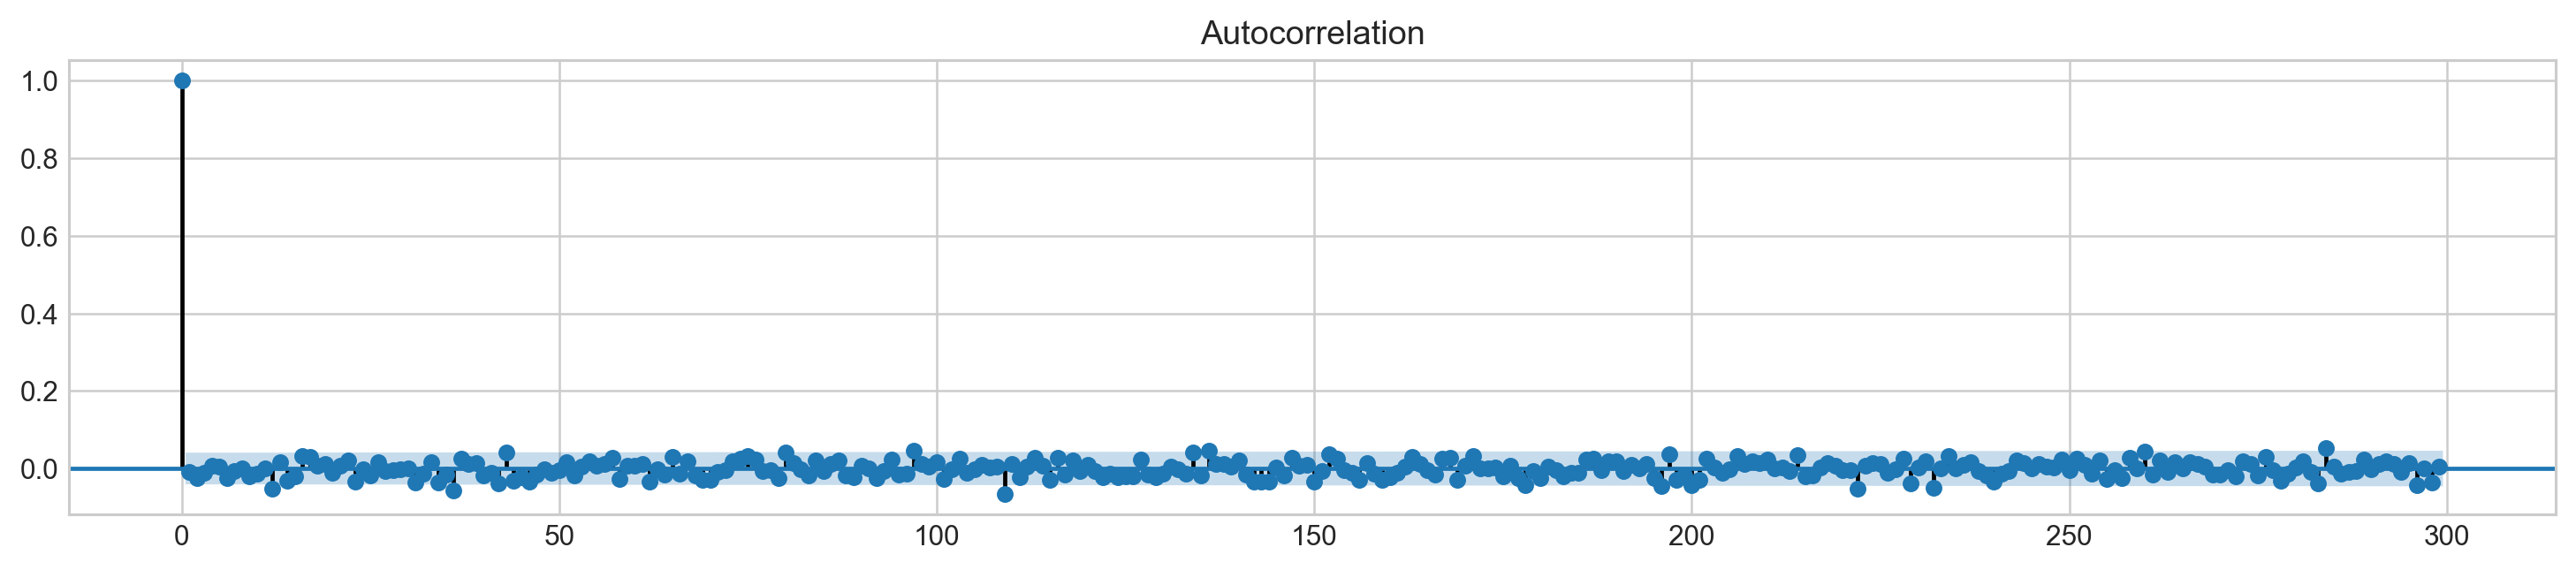

To make a conclusion we're going to try different orders and see how well they perform on a given data.

(0, 0, 0) - 51.5% accuracy   
(1, 0, 0) - 50.8% accuracy   
(0, 1, 0) - 51.3% accuracy   
(0, 0, 1) - 50.8% accuracy   
(1, 1, 0) - 51.8% accuracy   


### Review Predictions

### Histogram

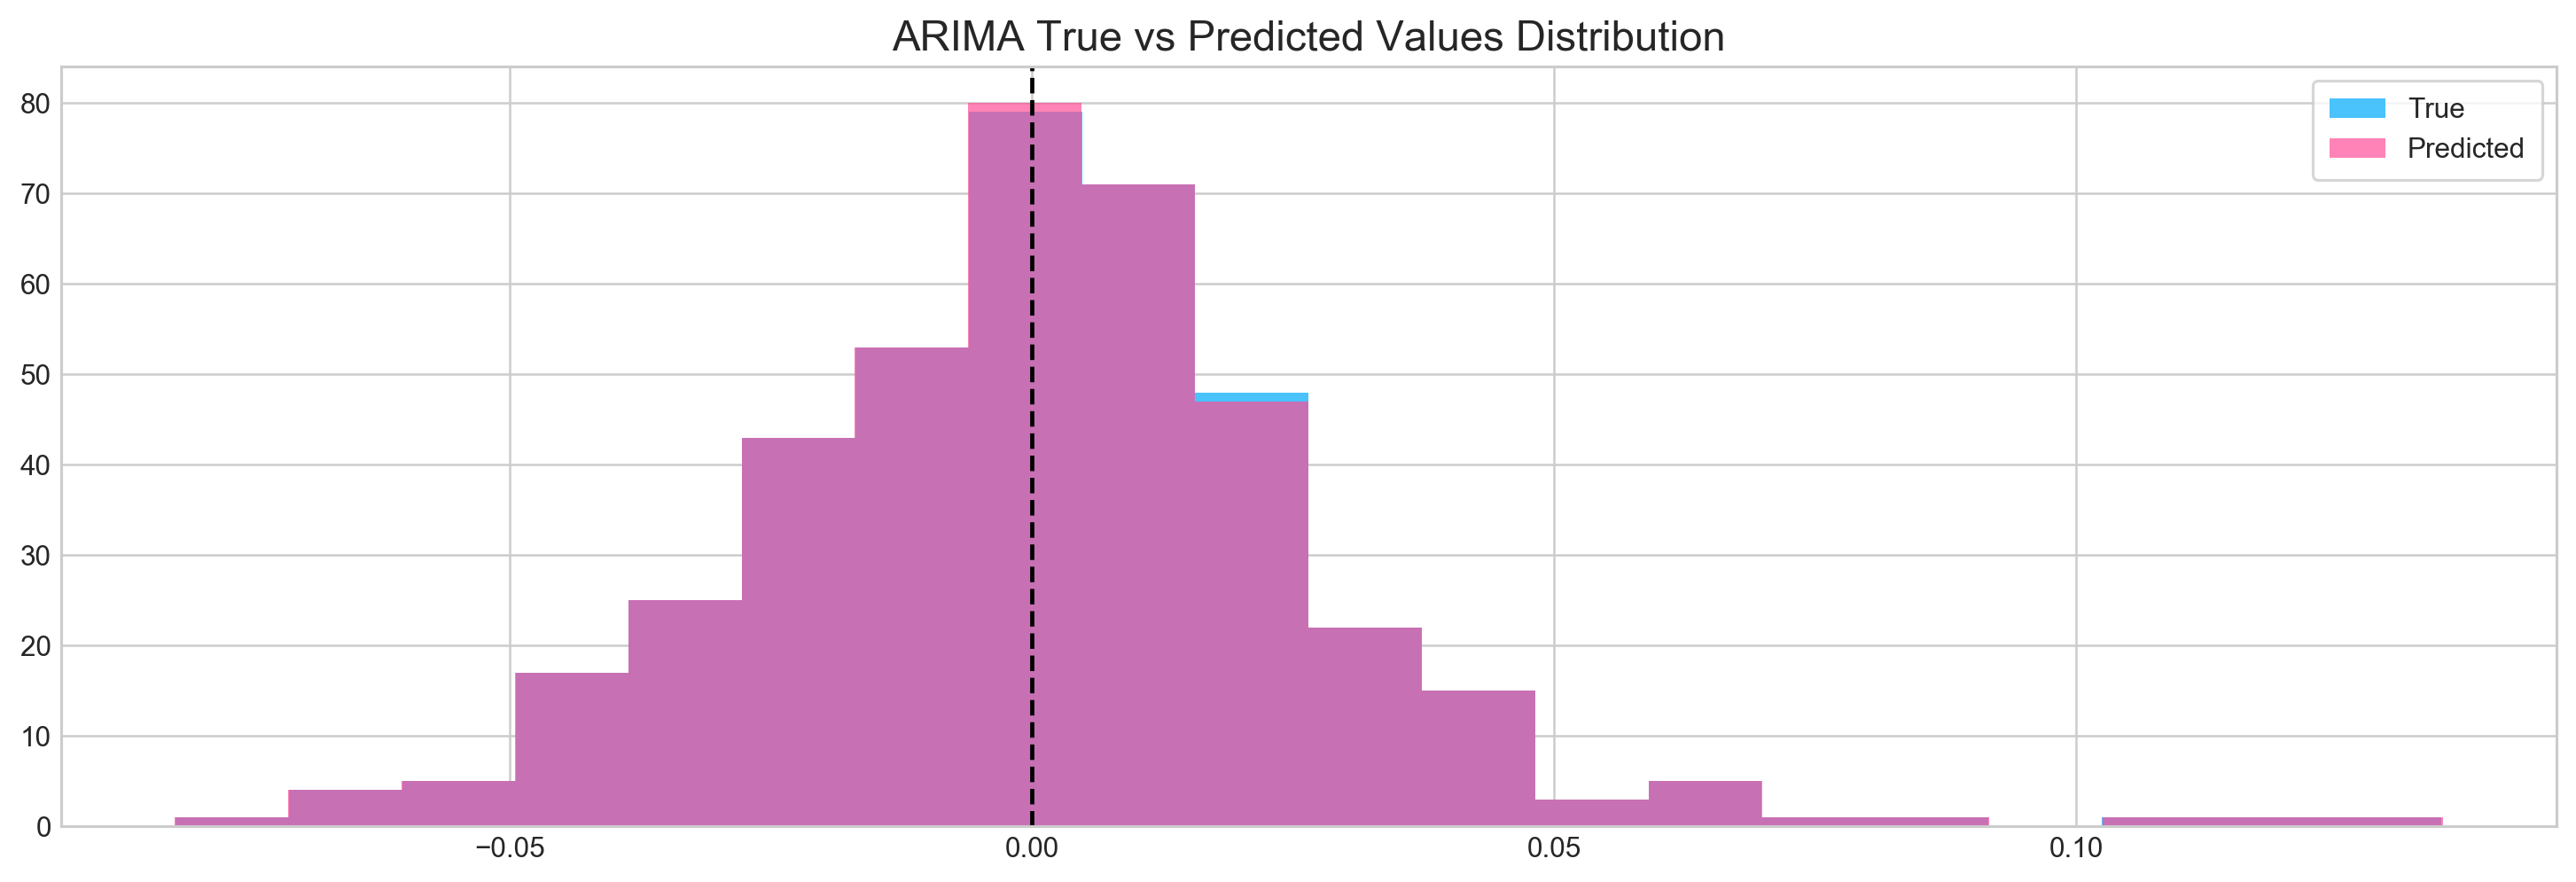

### Interpreting Results

True positive and Negative: 203
False Positive and Negative: 193
Accuracy: 51.3%


# 3. Sentiment Analysis

Idea here is to use news sentiment to predict returns next day

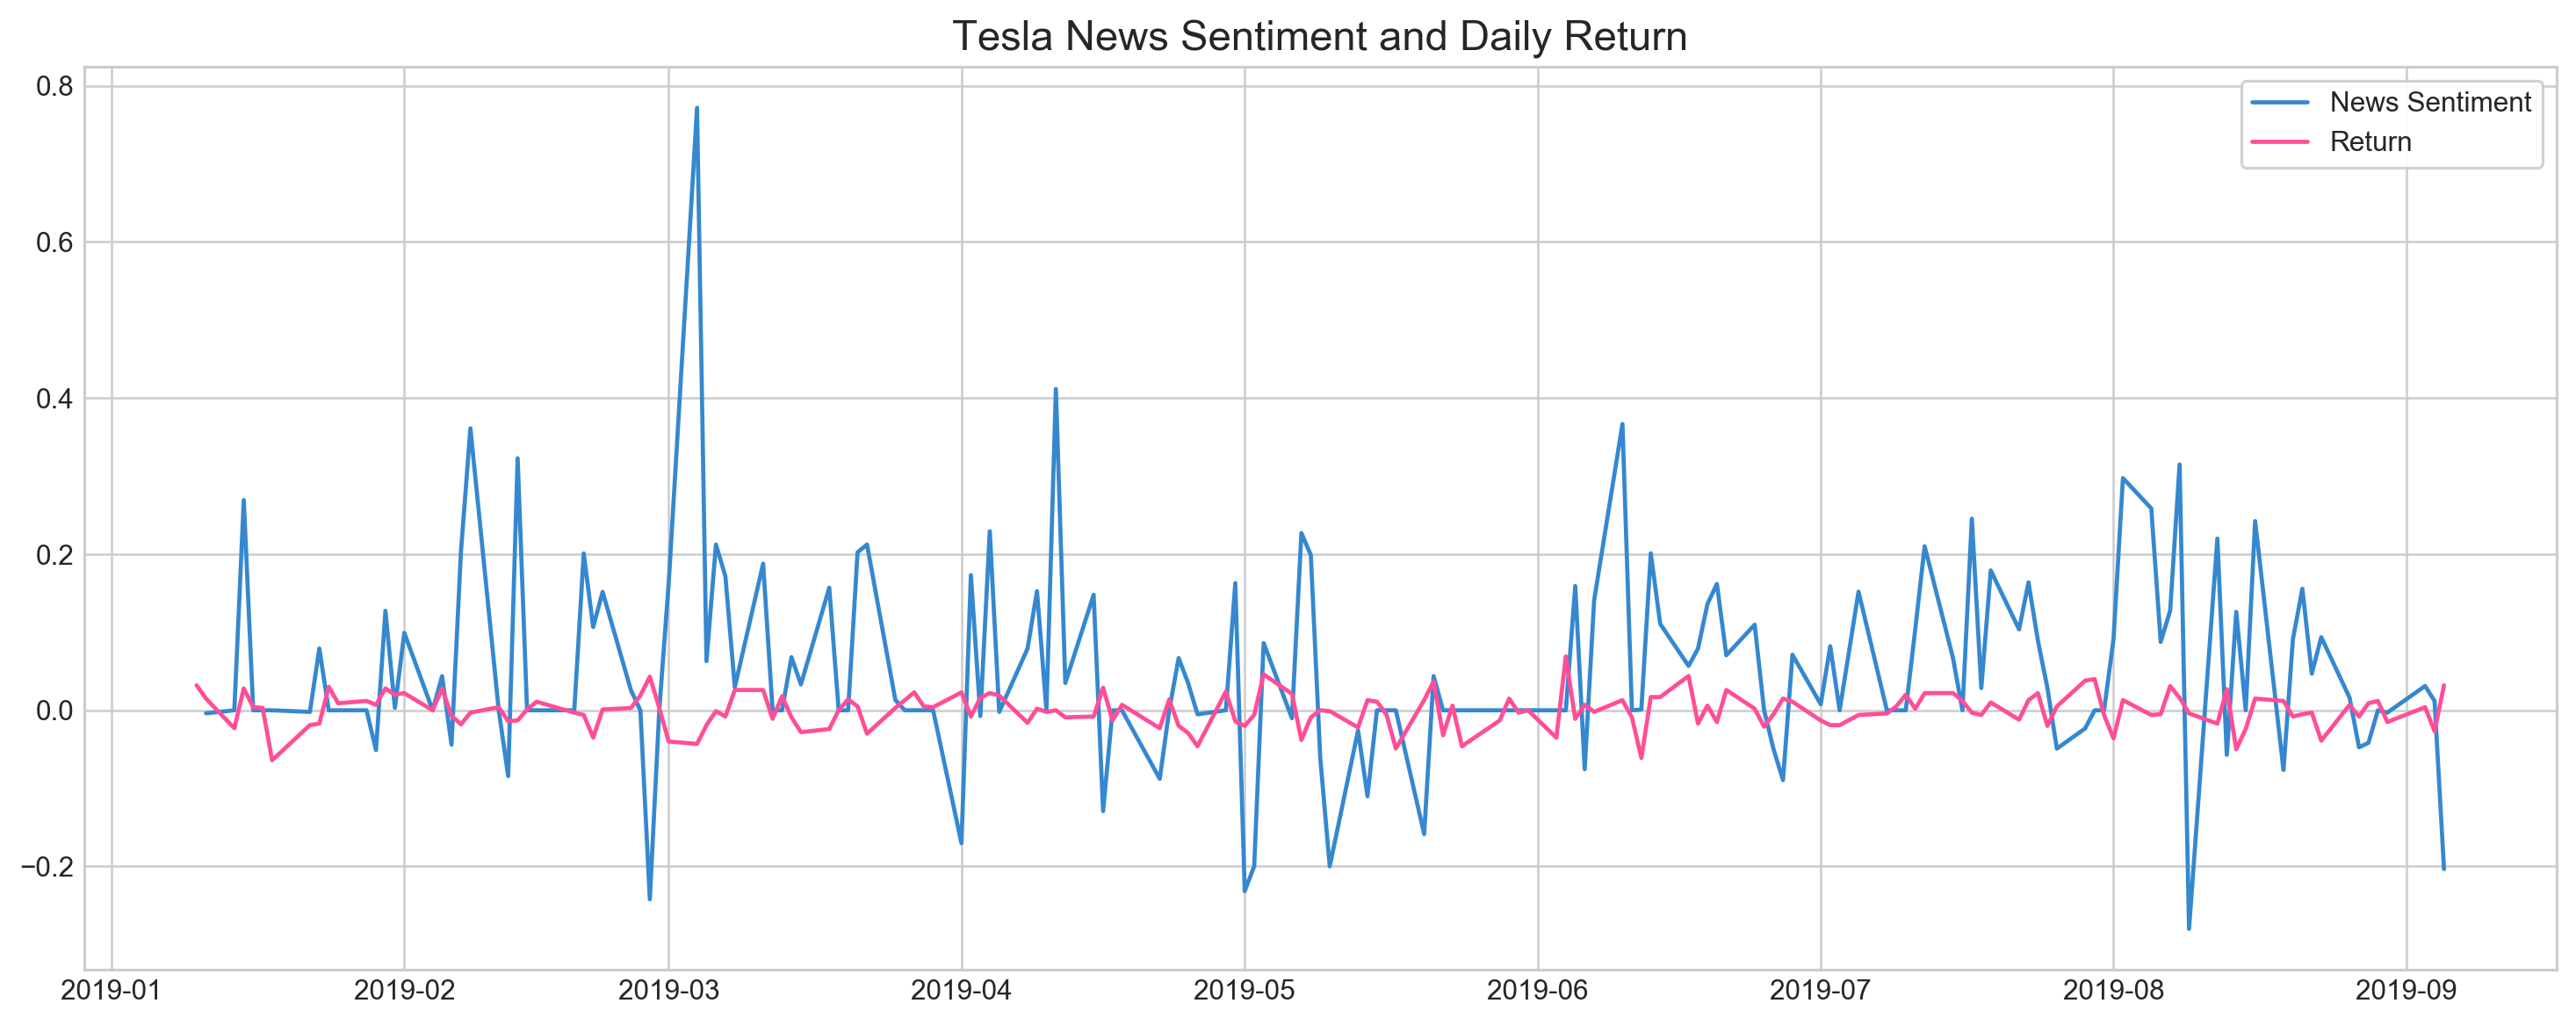

Sentiment    Return
Sentiment   1.000000 -0.139348
Return     -0.139348  1.000000

### Conclusion

Correlation between news and price movement is negative. Prices moves in the opposite direction, which is wrong. Positive news suppose to drive prices up, not the opposite way.

# 4. Features selection with XGBoost

XGBoost will be used here to extract important features that will be used for neural networks. This might help to improve model accuracy and boost training. Traning will be performed on scaled `Tesla` dataset.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

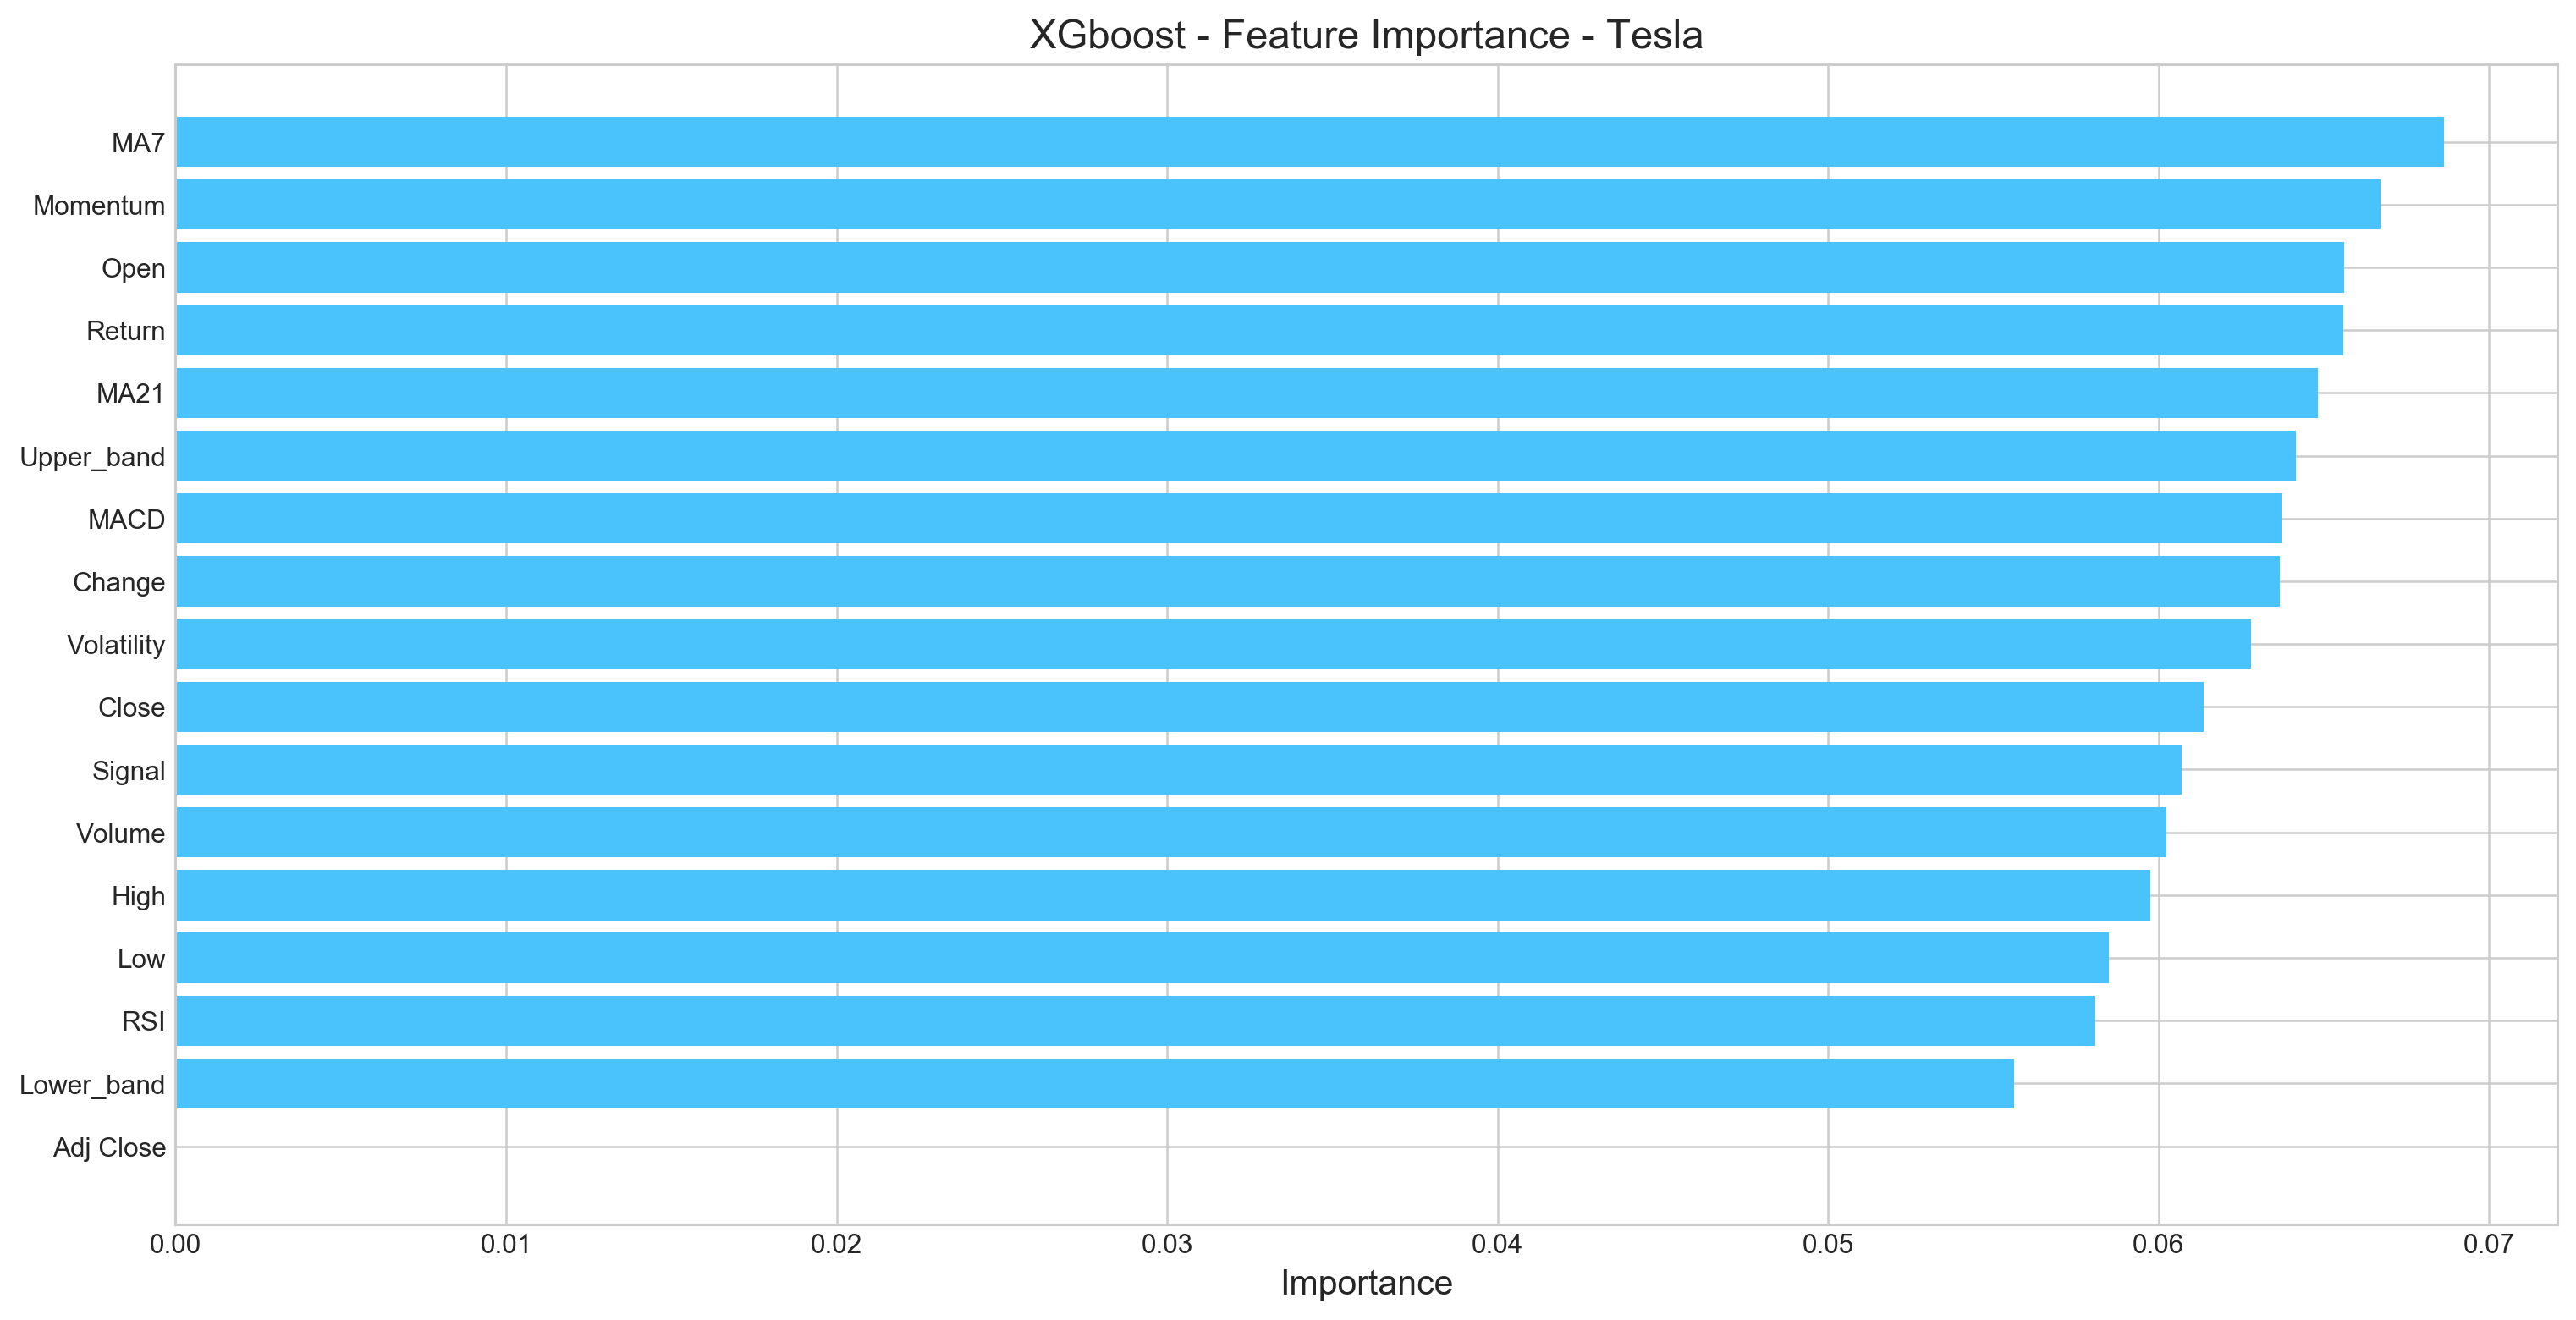

# 5. Deep Neural Networks

## Preparing Data

## 5.1 LSTM Network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 21, 100)           47200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 77,921
Trainable params: 77,921
Non-trainable params: 0
_________________________________________________________________


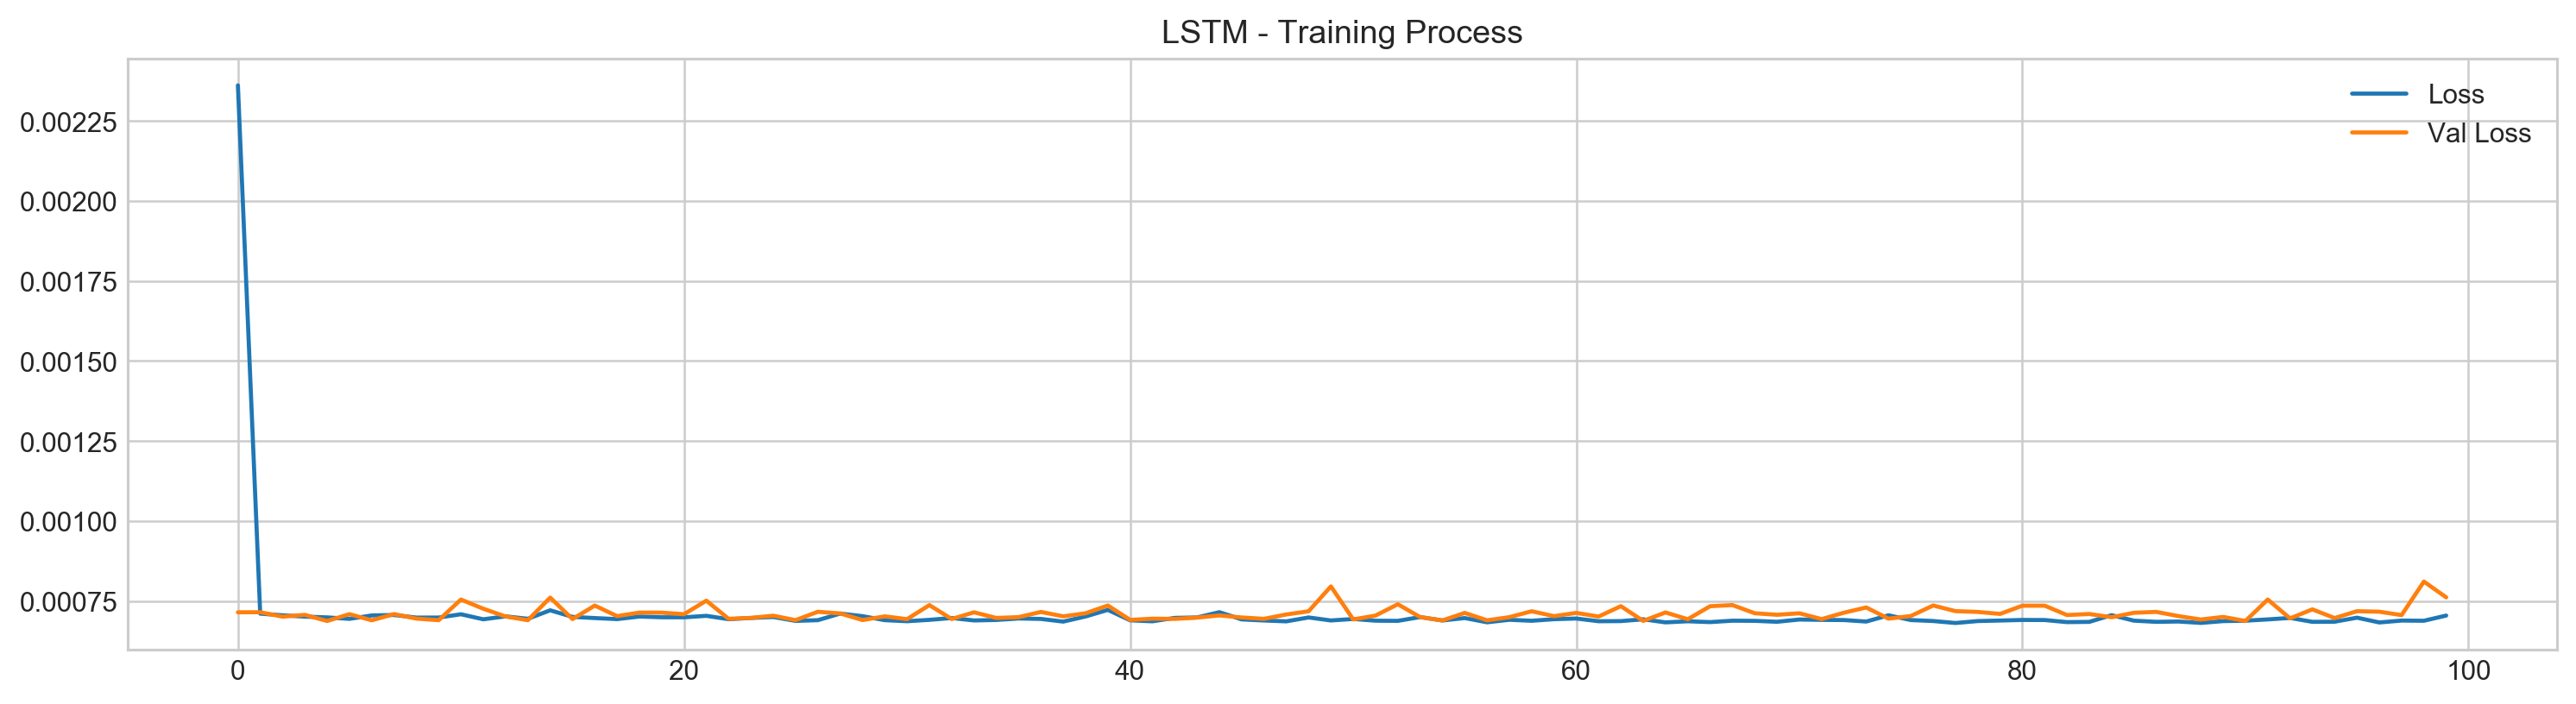

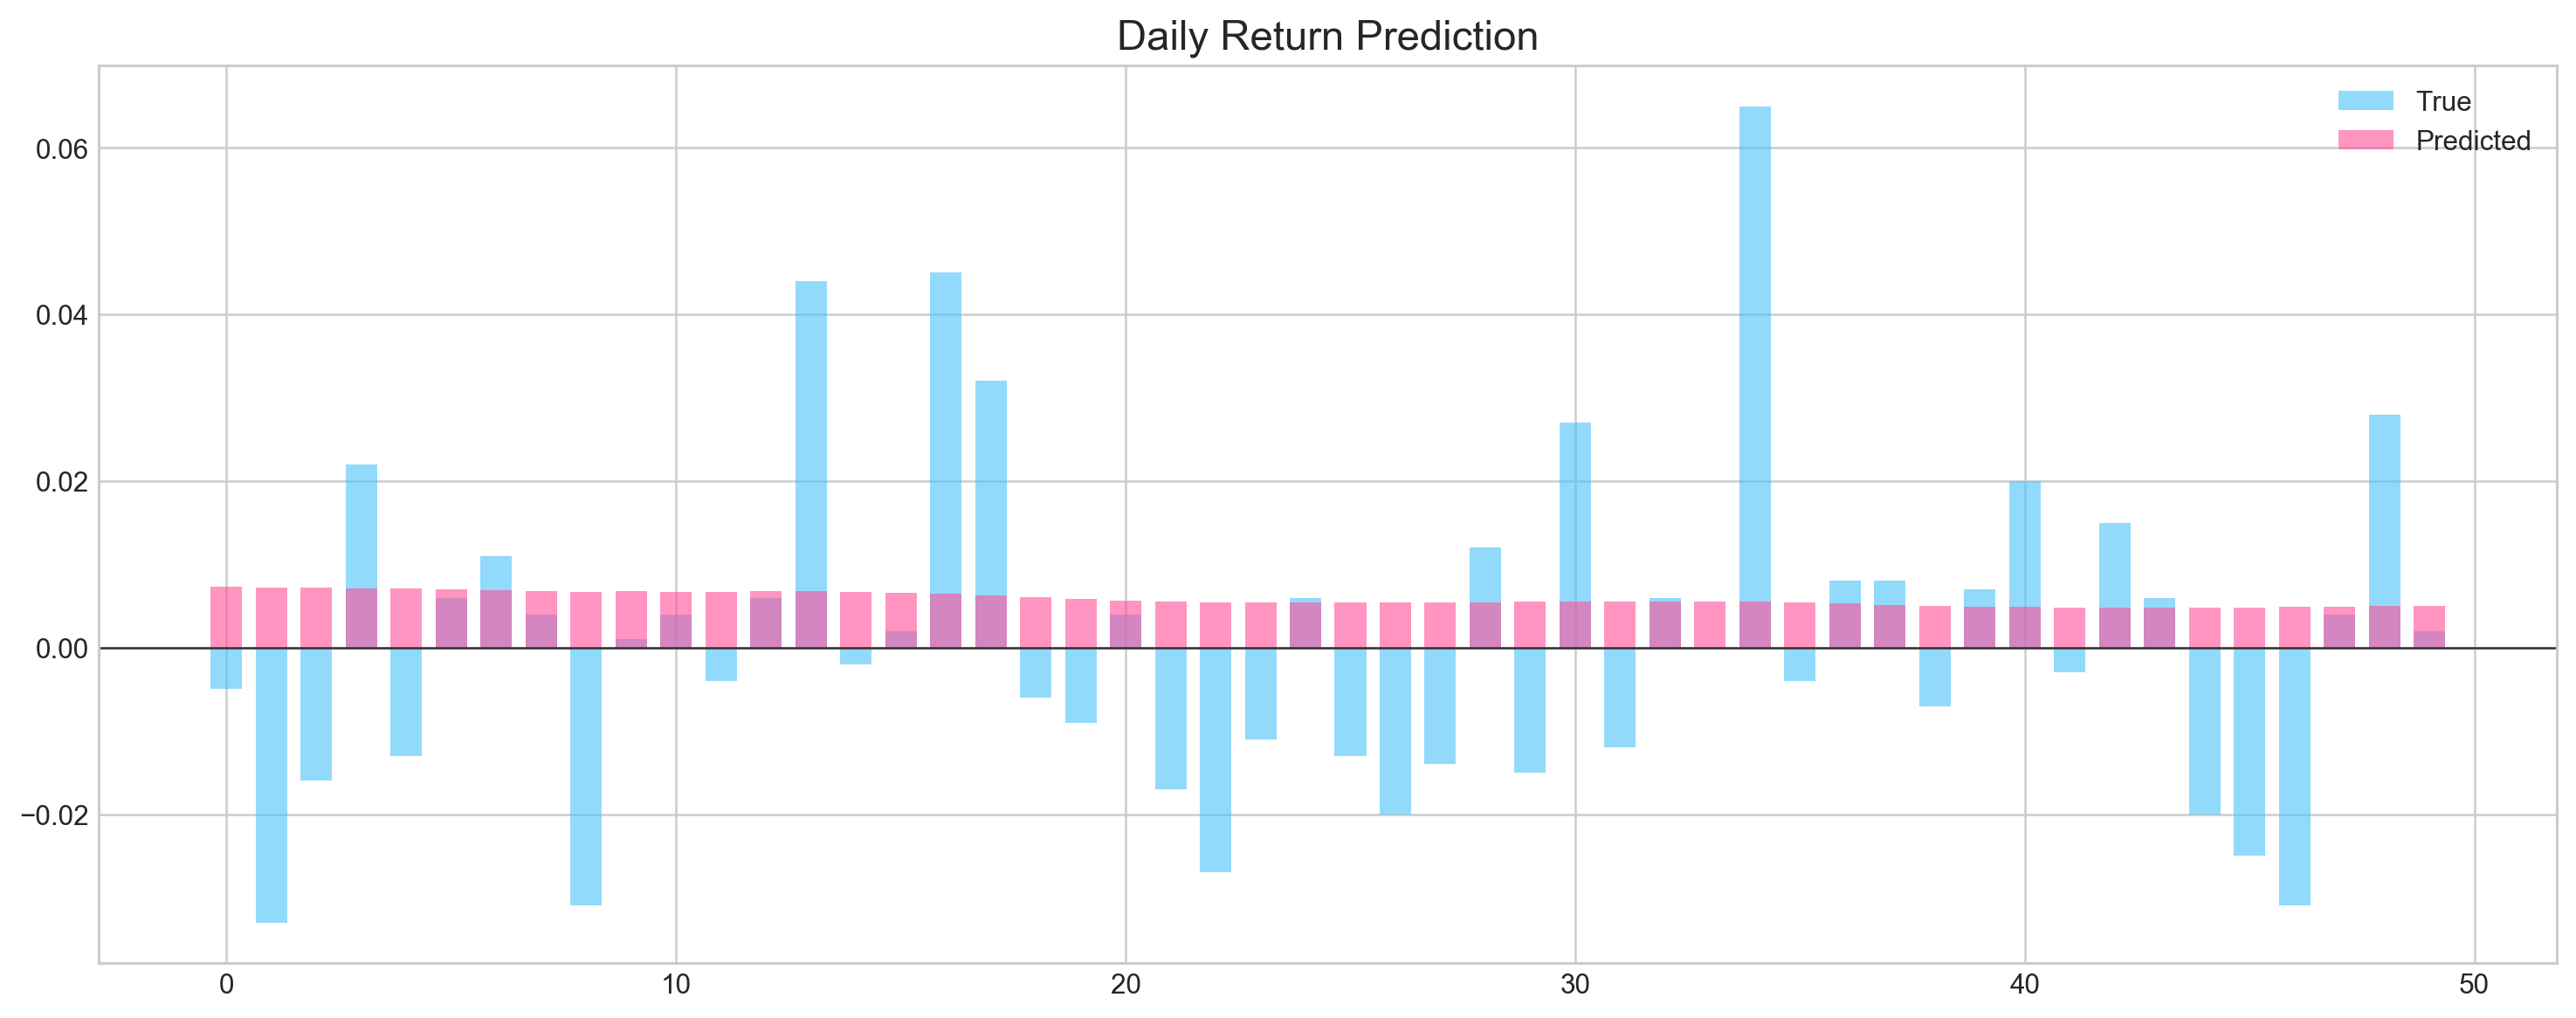

MSE: 0.0004098401772089238
Accuracy: 52%


### Conclusion

Network wasn't able to pick up the underlying patterns. Prediction is roughly 50%, which is same as random guess

## 5.2 Convolutional Network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 20, 20)            700       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 20)            0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1005      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


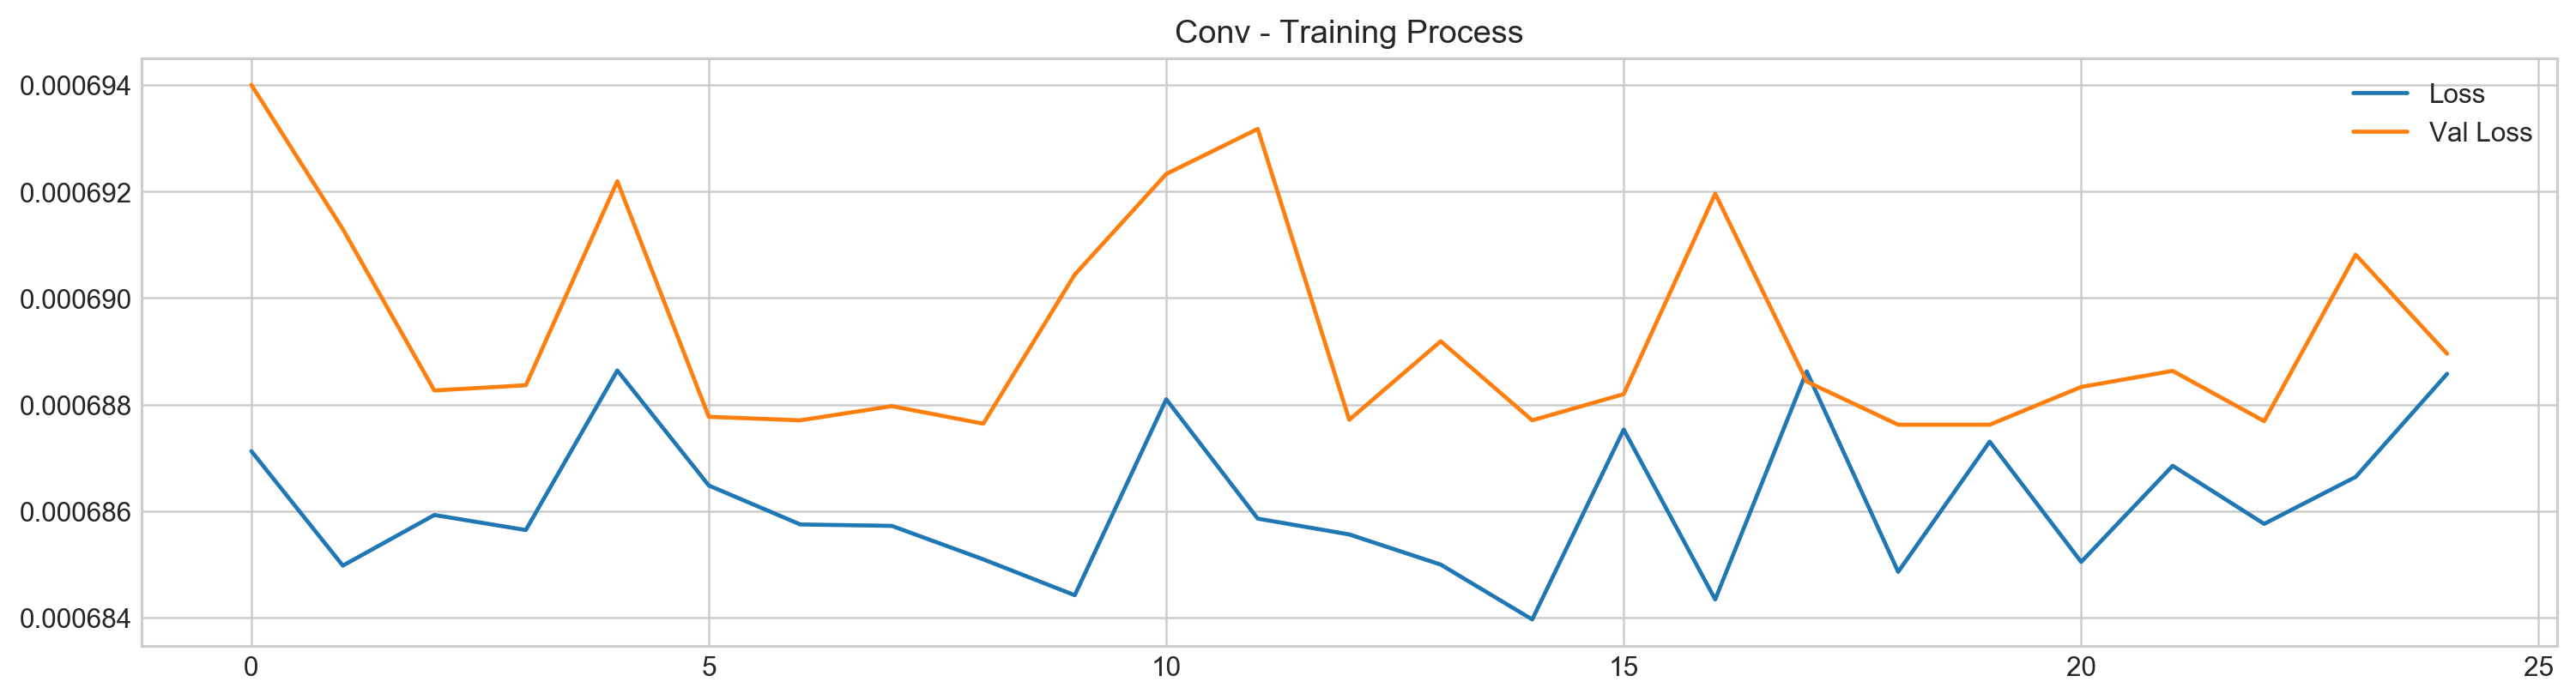

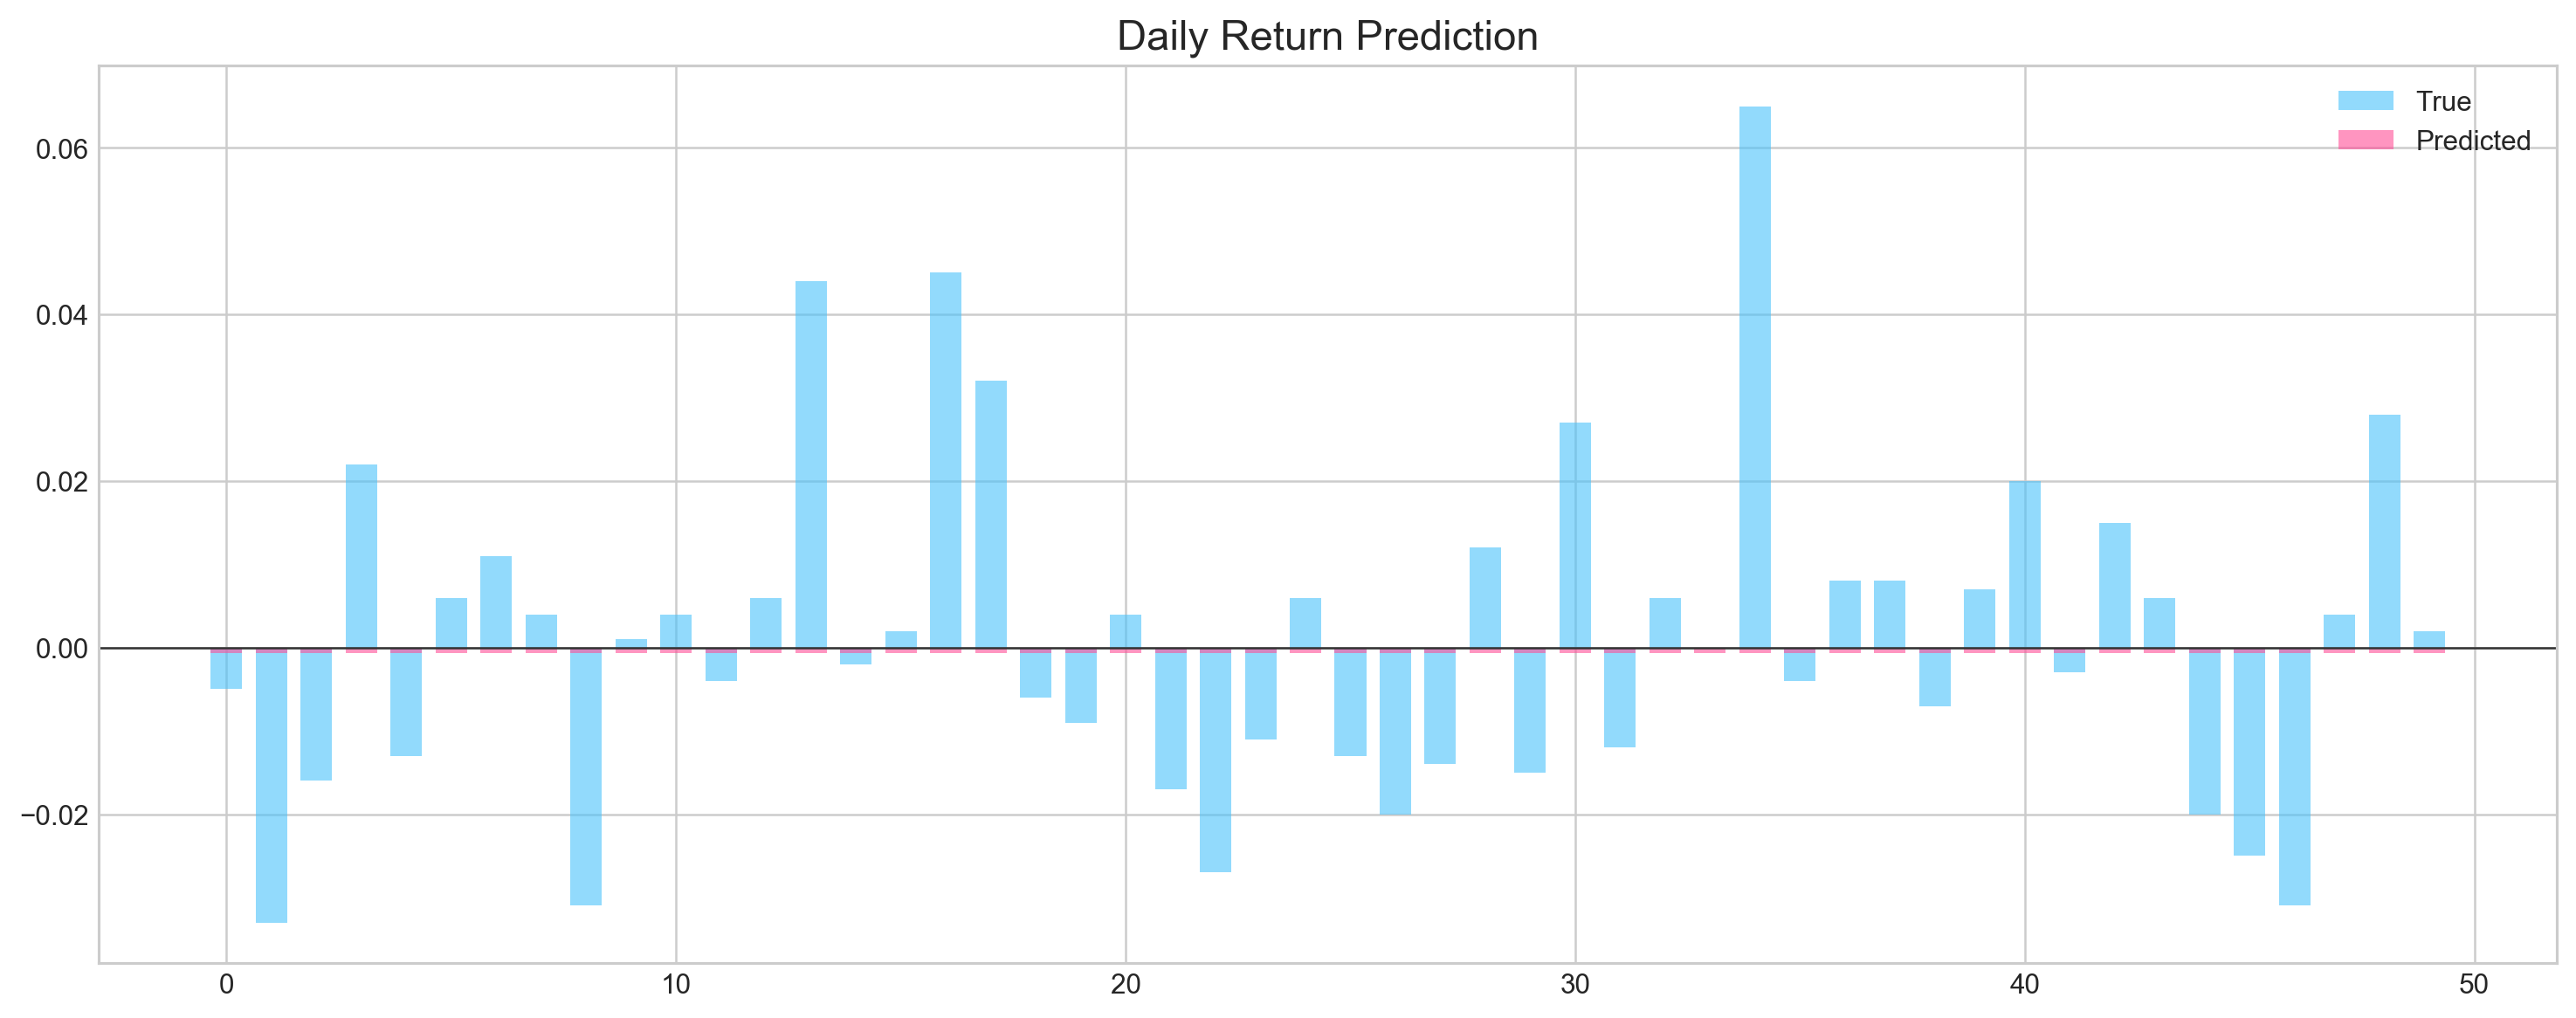

MSE: 0.00039170174676989575
Accuracy: 46%


### Conclusion

Network wasn't able to pick up the underlying patterns. Prediction is roughly 50%, which is same as random guess

## 5.3 Combined Stocks Data

Training on 18 different stocks.

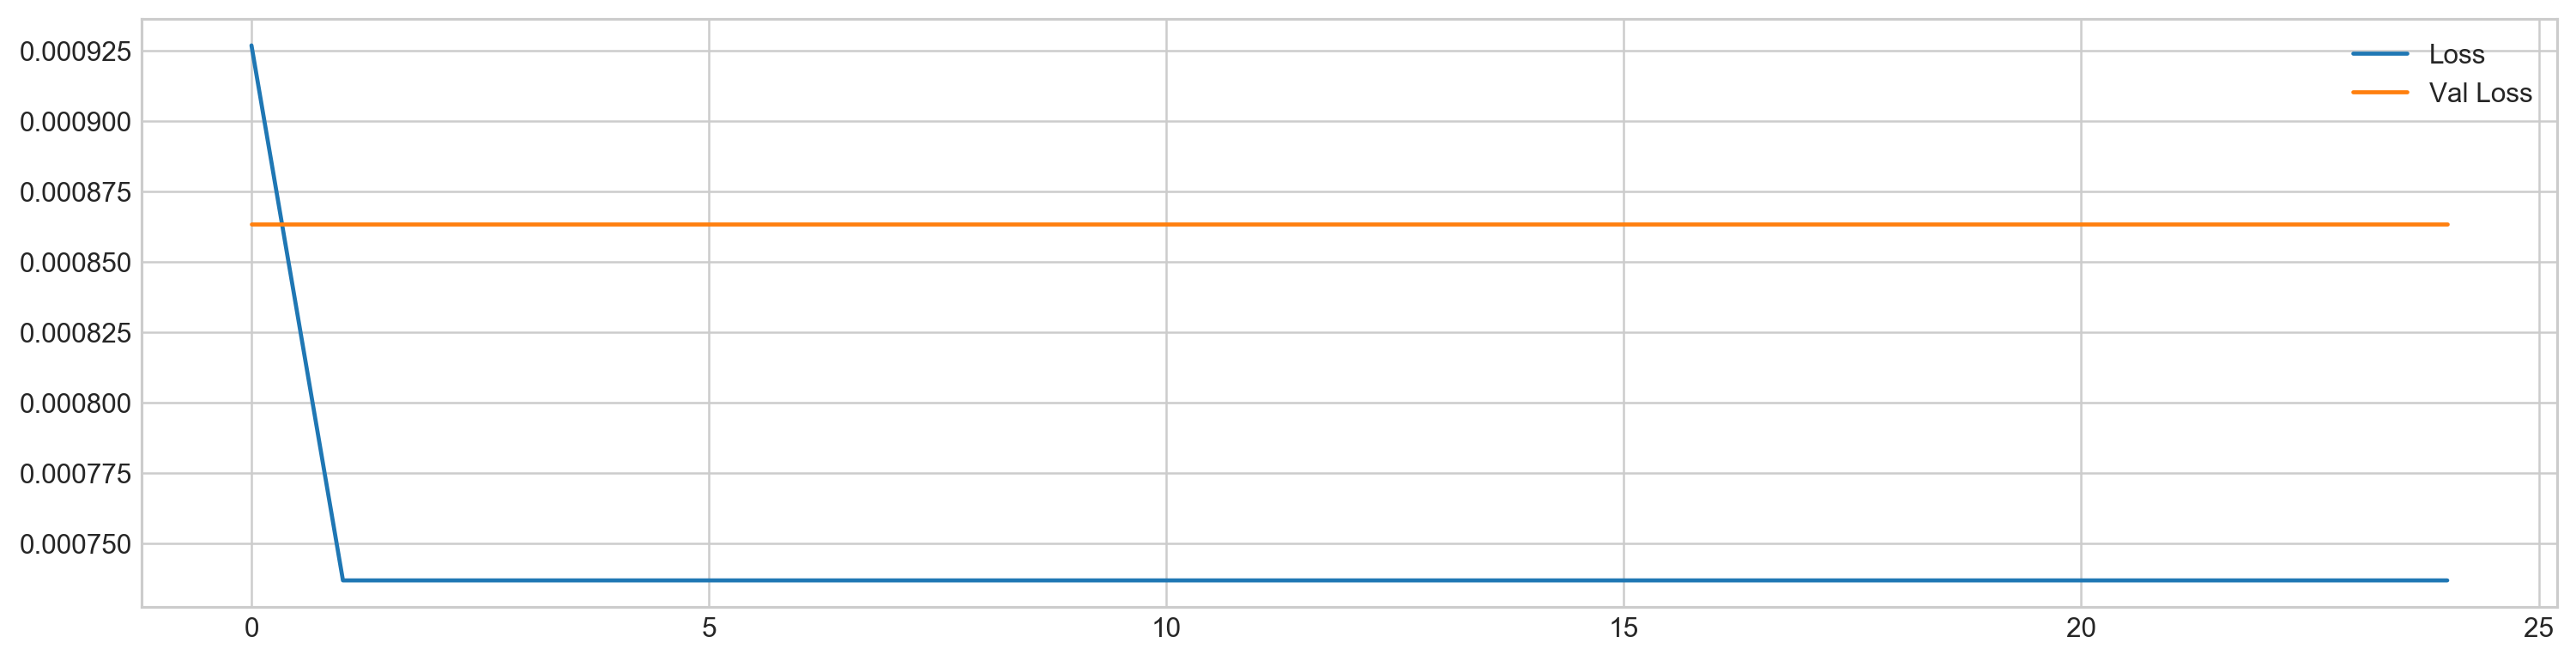

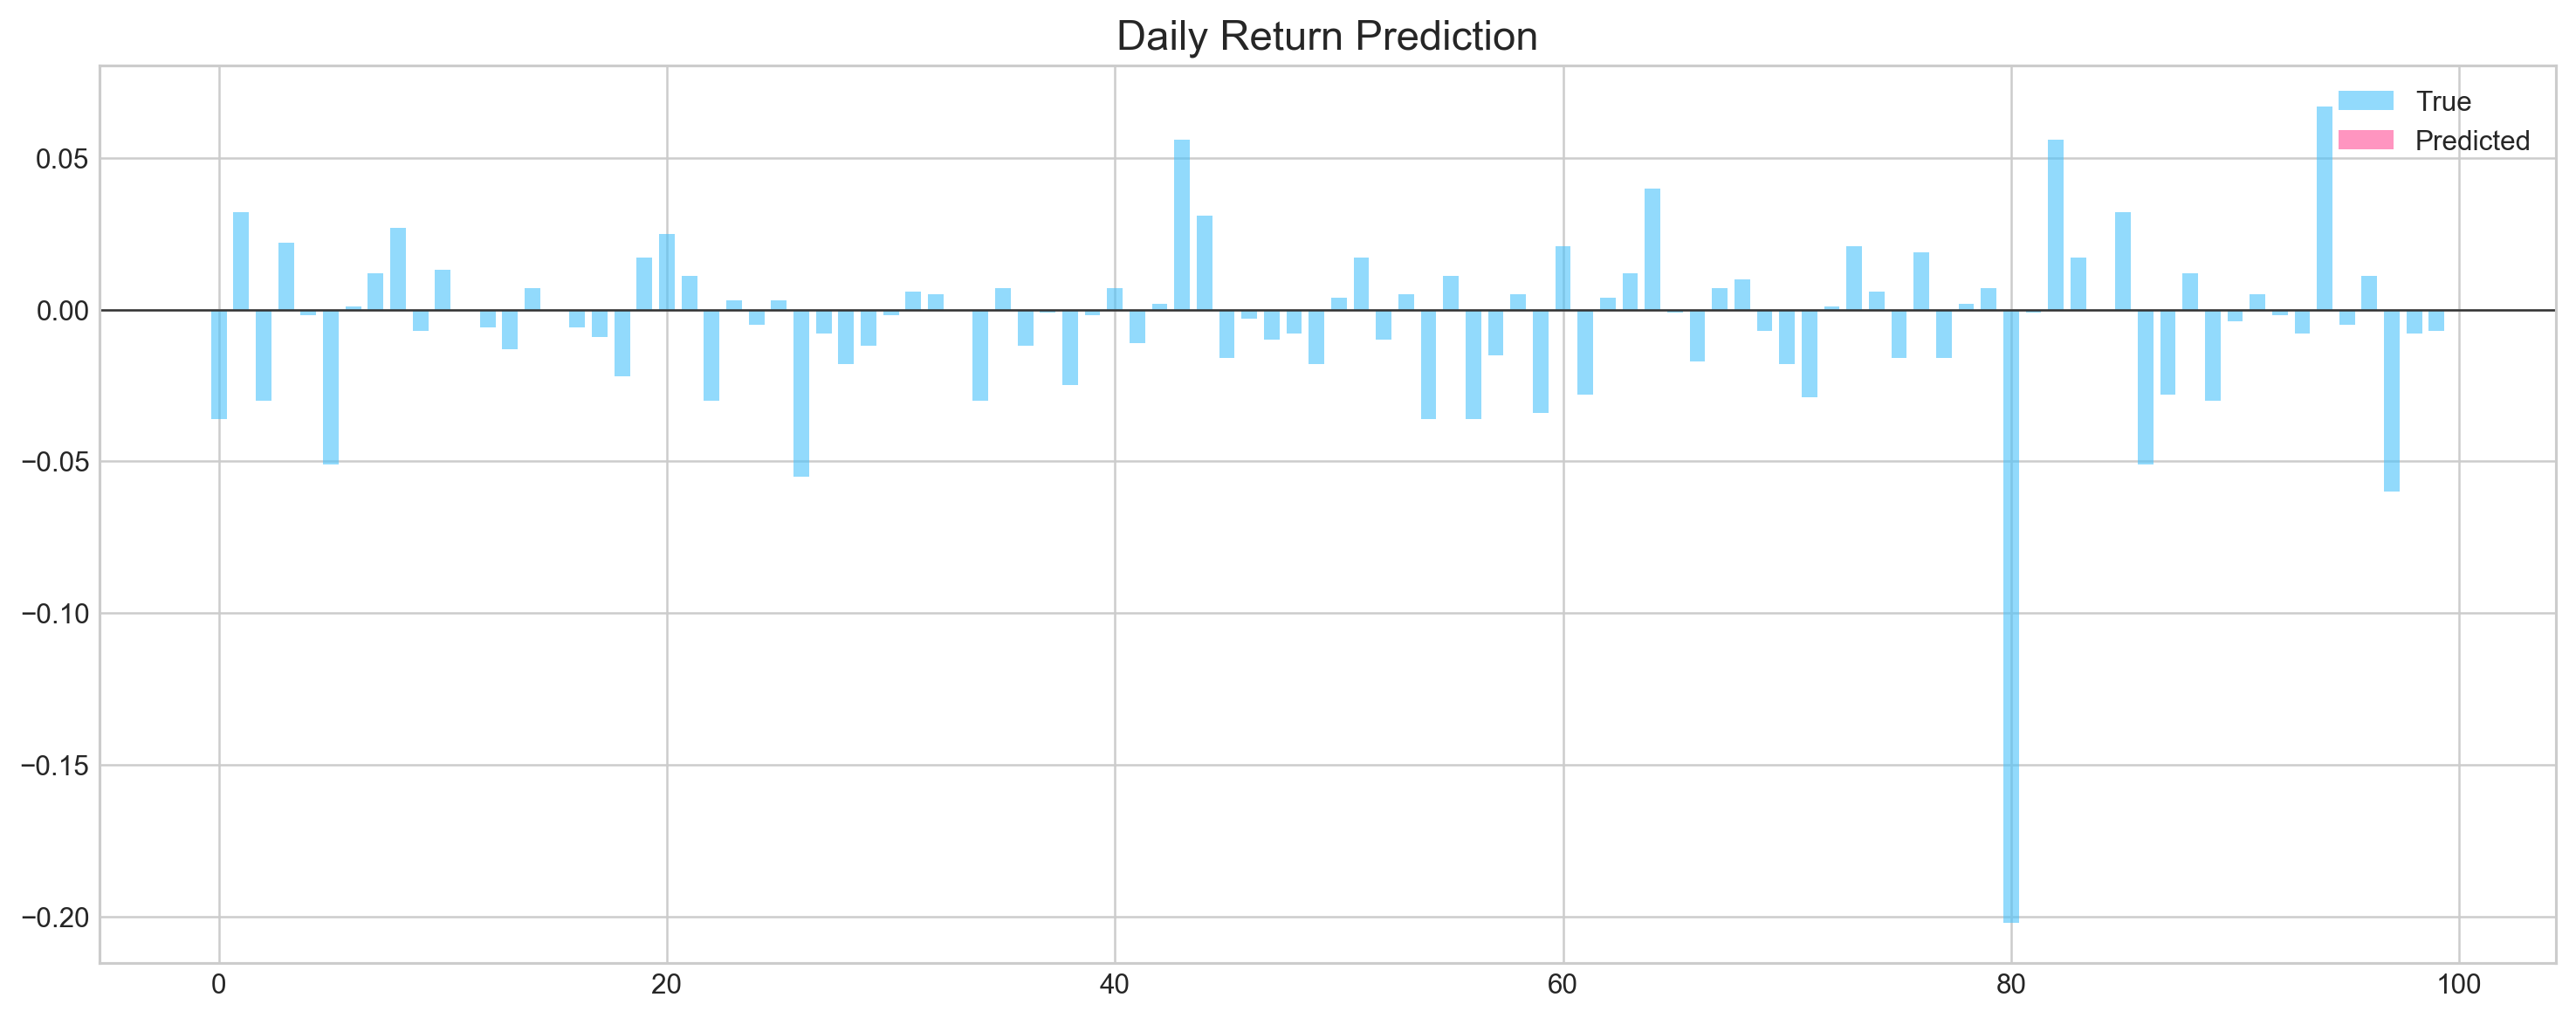

MSE: 0.0008933400166195816
Accuracy: 0%


## 5.4 Bayesian Optimization

|   iter    |  target   |    d1     |    d2     |  filters  |  kernel   |   pool    |
-------------------------------------------------------------------------------------
|  1        |  0.000697 |  197.5    |  31.61    |  1.001    |  4.419    |  3.174    |
|  2        |  0.000688 |  168.3    |  15.59    |  4.11     |  5.174    |  6.311    |
|  3        |  0.000687 |  197.7    |  30.56    |  2.84     |  9.025    |  2.219    |
|  4        |  0.000685 |  220.3    |  22.52    |  6.028    |  3.123    |  3.585    |
|  5        |  0.000697 |  232.1    |  39.05    |  3.821    |  7.539    |  9.011    |
|  6        |  0.000905 |  249.9    |  10.57    |  9.351    |  4.988    |  9.367    |
|  7        |  0.000687 |  160.9    |  10.15    |  9.038    |  9.98     |  9.433    |
|  8        |  0.000688 |  249.5    |  10.1     |  9.981    |  8.354    |  9.82     |
|  9        |  0.000689 |  160.3    |  39.92    |  8.524    |  7.485    |  8.883    |
|  10       |  0.000695 |  249.8    |  39.55    |  1.1

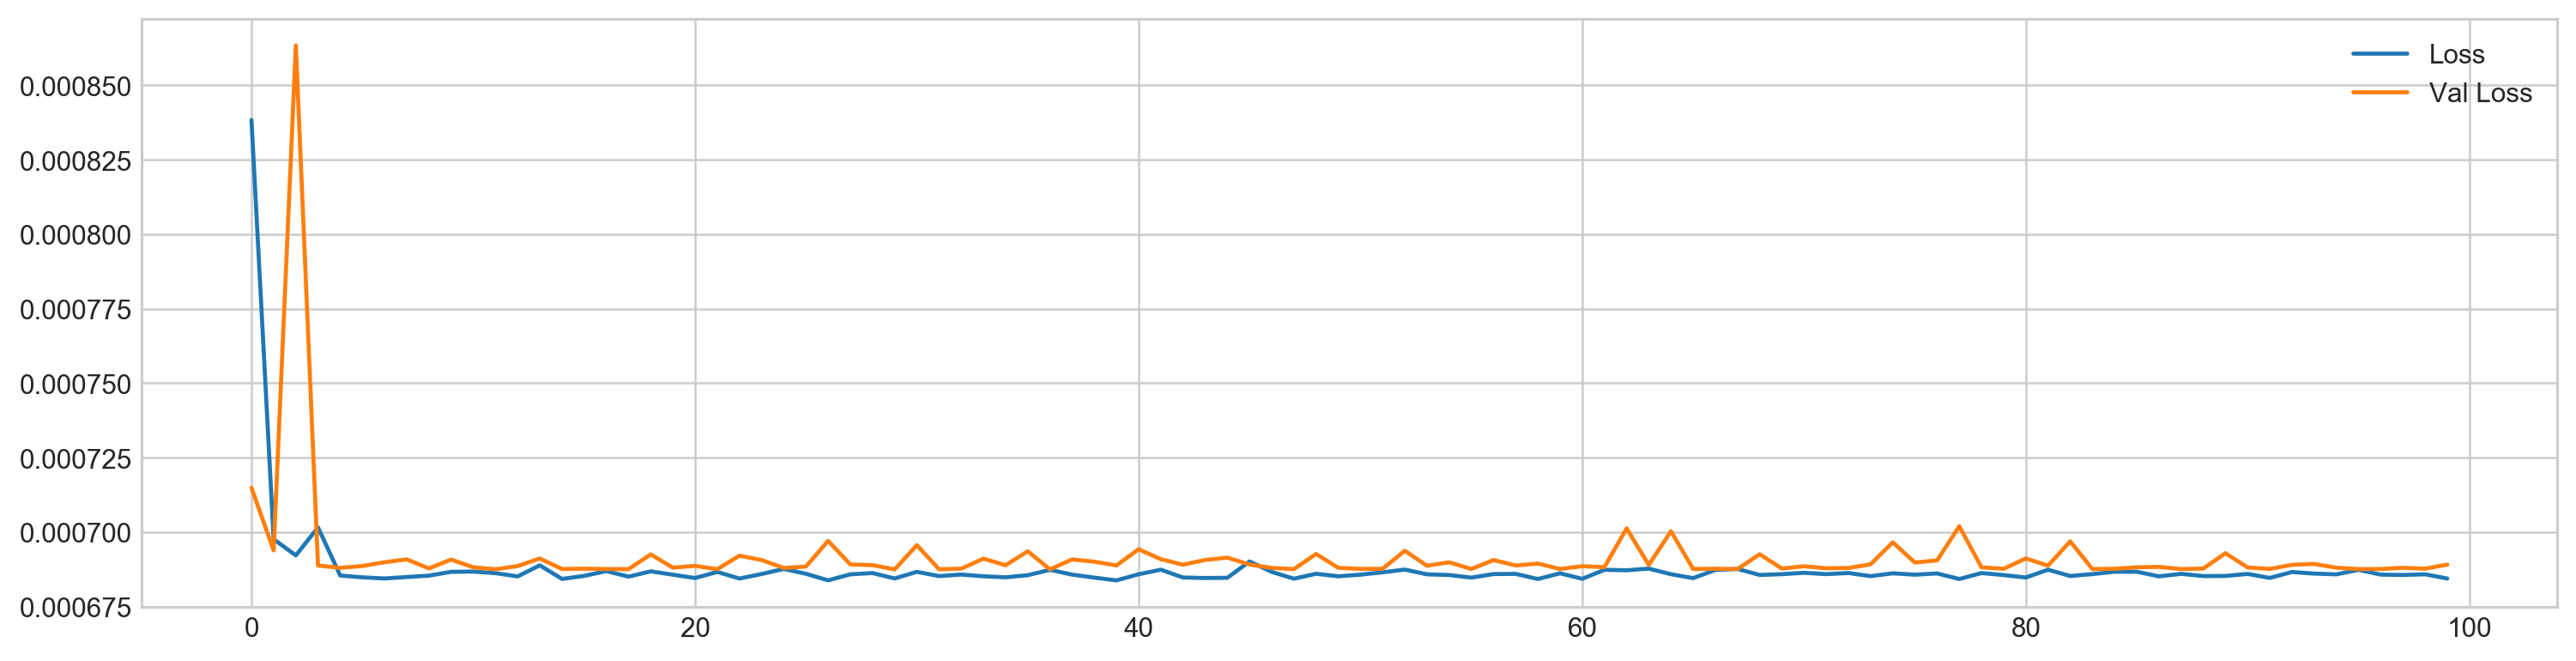

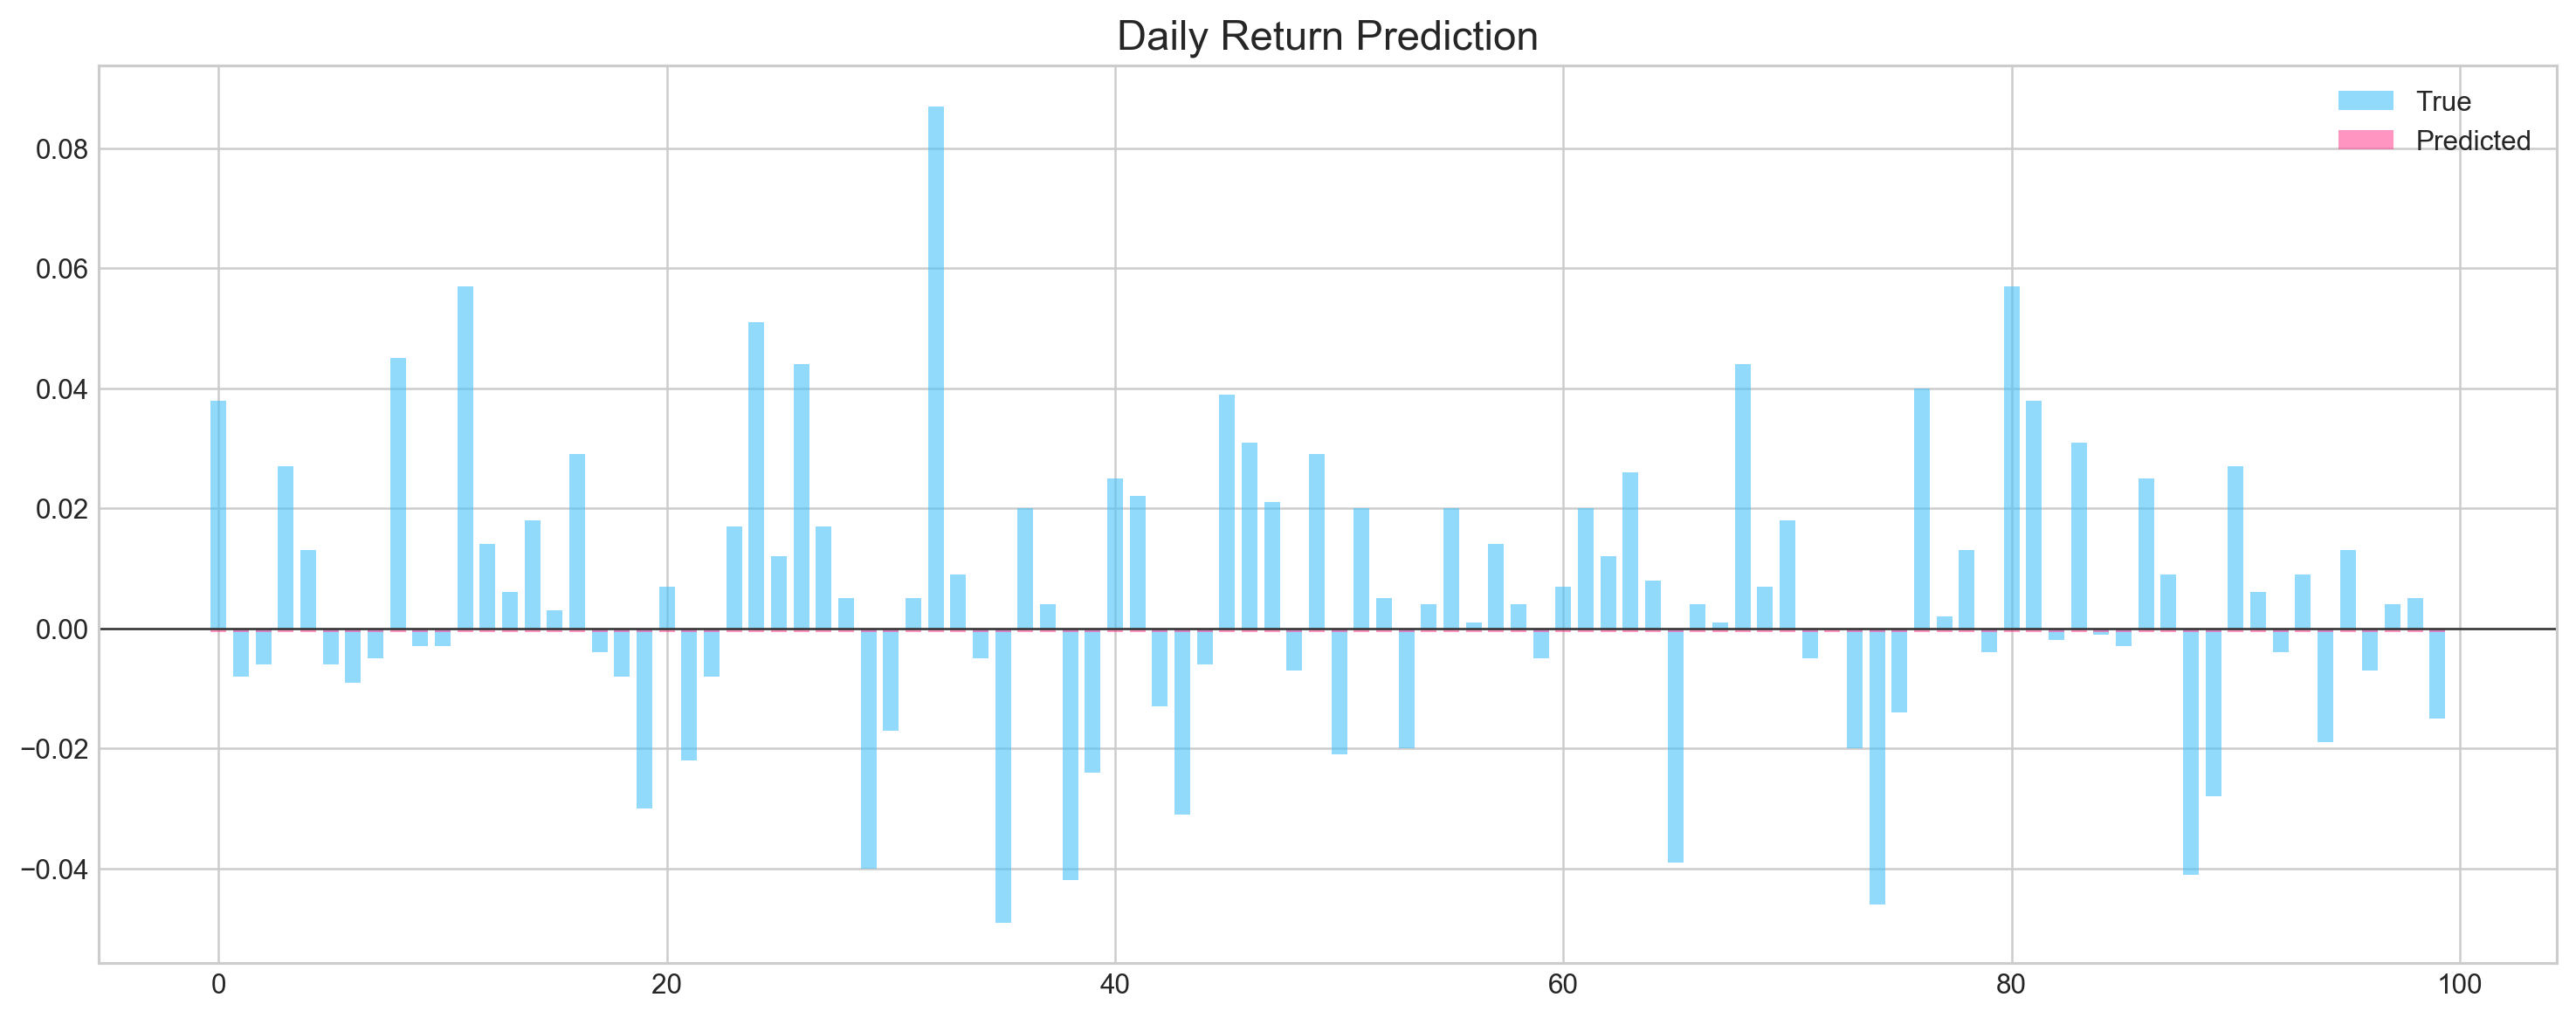

MSE: 0.0005993790584345679
Accuracy: 40%


### Conclusion

Bayesian optimization didn't improve accuracy. Results are similar to the previous networks.

# 6. Finding Similar Patterns

Hypothesis behind this idea is simple: can patterns (sequences) found train set be used to predict patterns in test set? Pattern is a sequence of daily stock returns presented as binary values (0 - if return is negative, 1 - if return is positive). Example of sequence: [0, 1, 1, 0, 1, 0, 0, 1, 0]. The process can be broken down into several steps:
1. Split data into train and test sets
2. Pick first pattern (with length of 9 days) from test set and collect similar patterns in train set
3. Compare 10th day of train patterns with 10th day of test pattern, save result
4. Repeat process for the rest of the patterns in test set

## Example

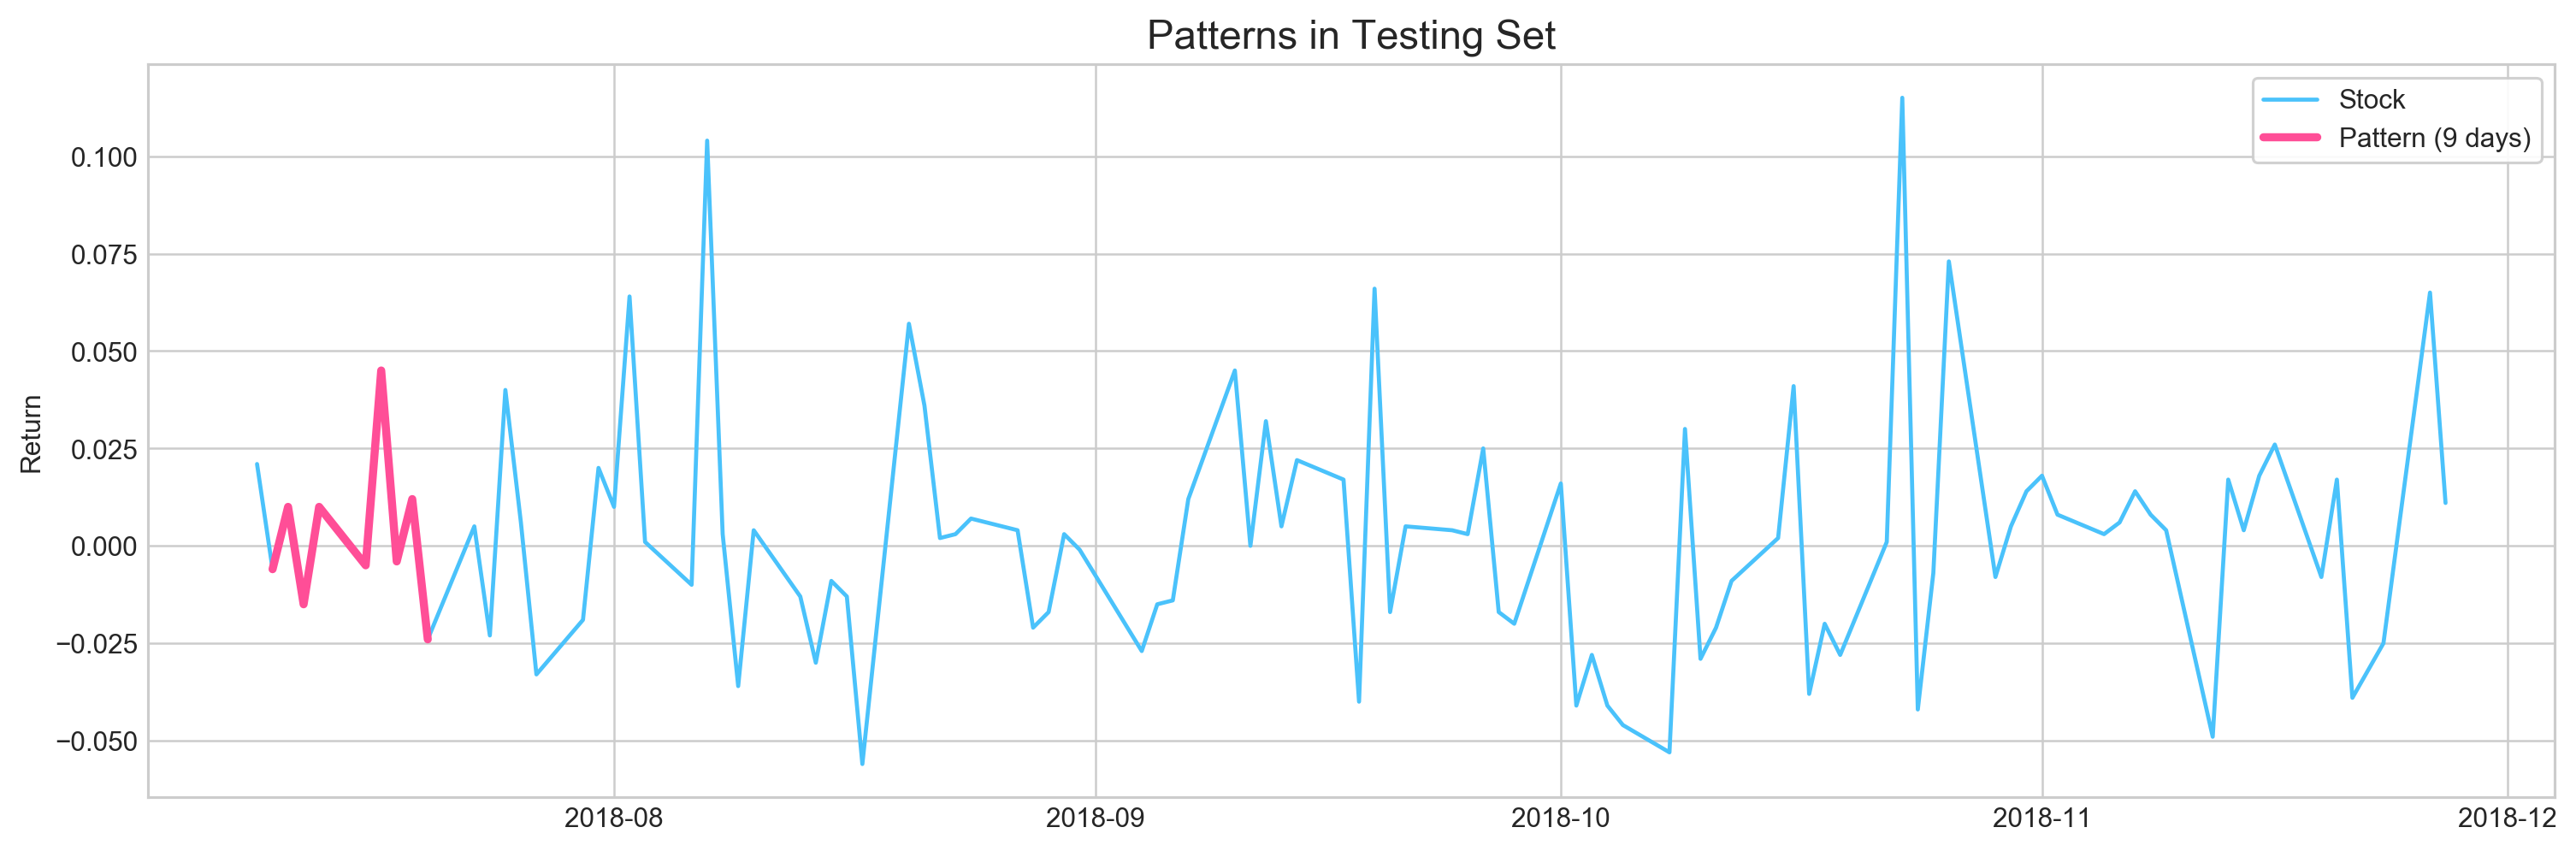

## Evaluating Pattern Matching Technique

Accuracy: 0.7


## Similar Patterns to the Example

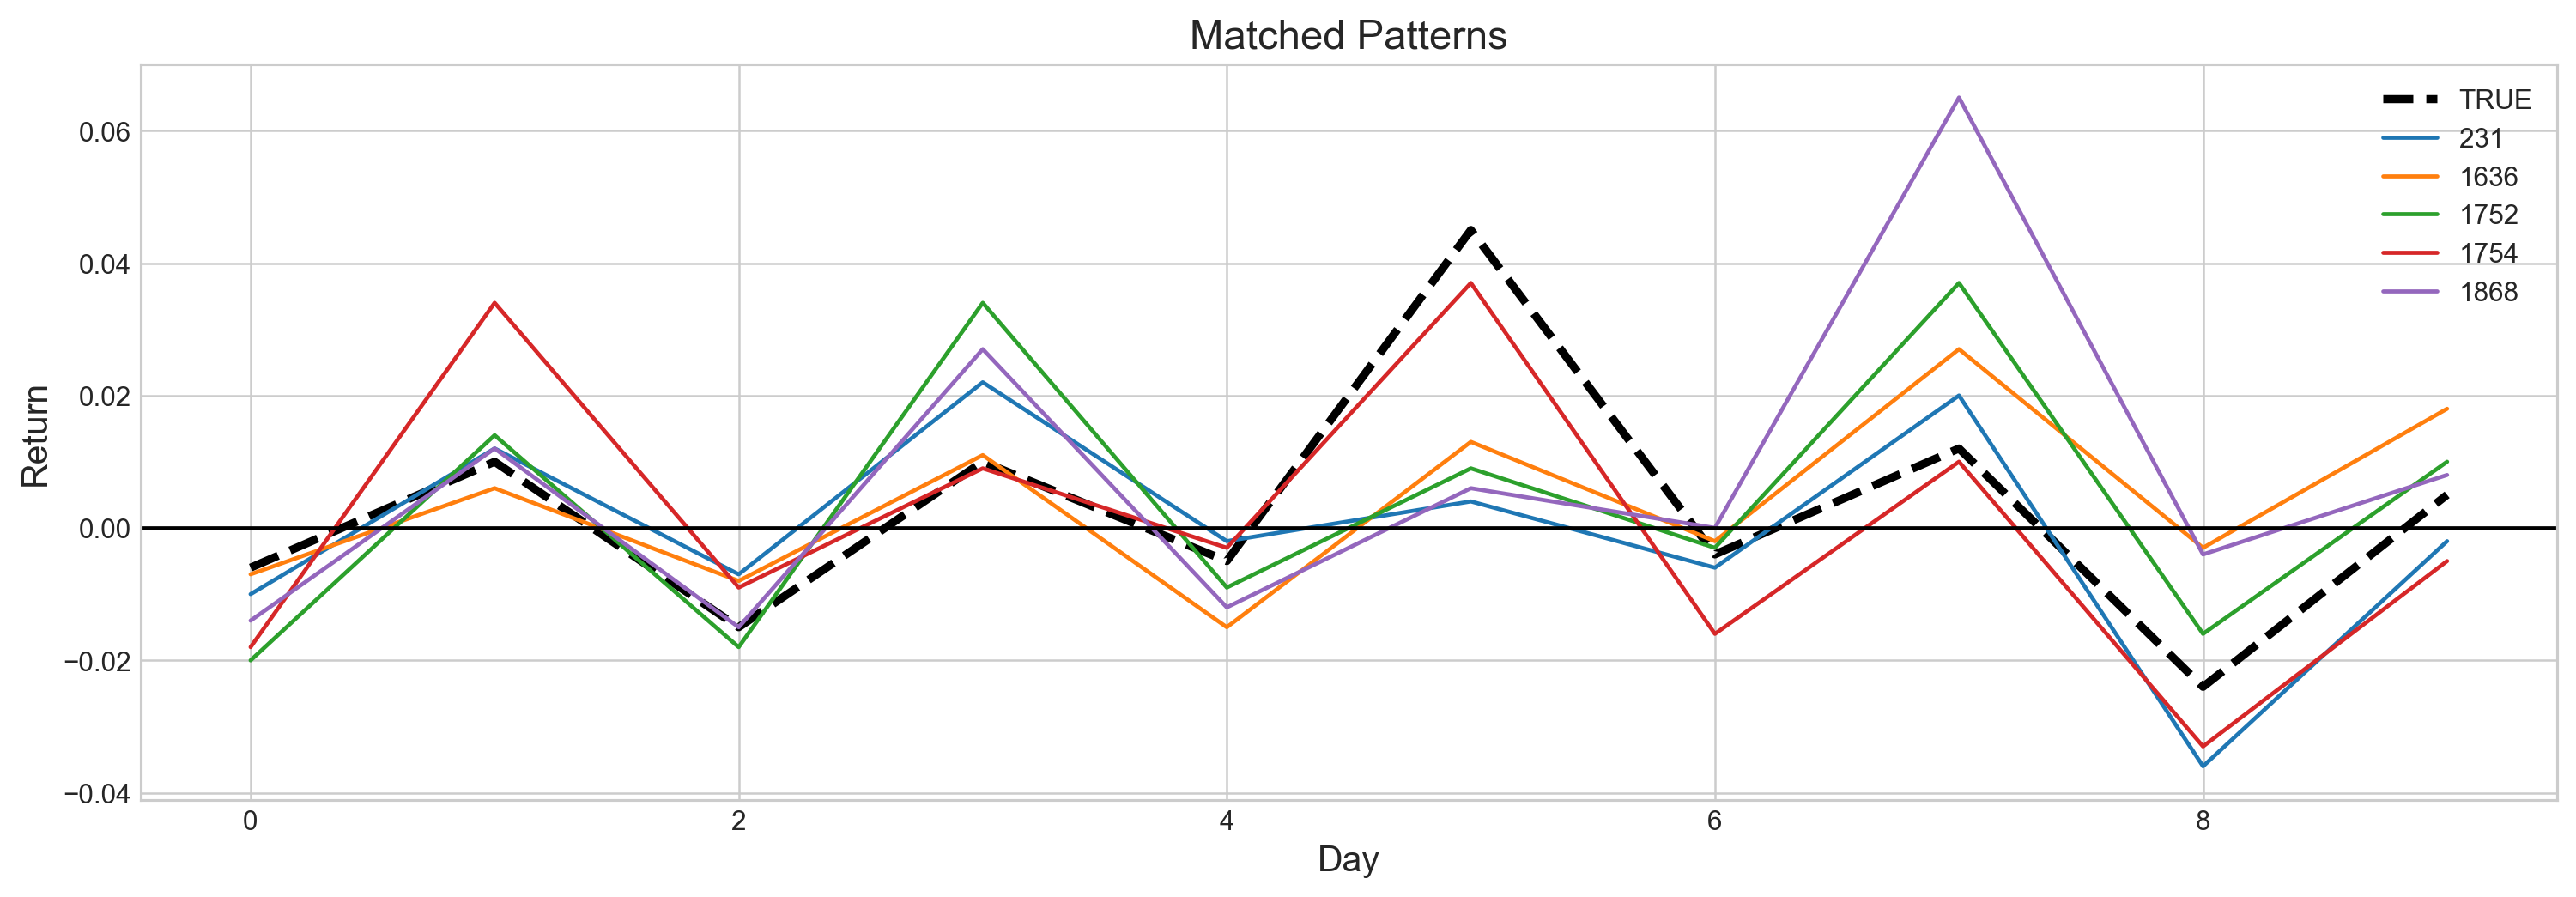

## Visual Comparison

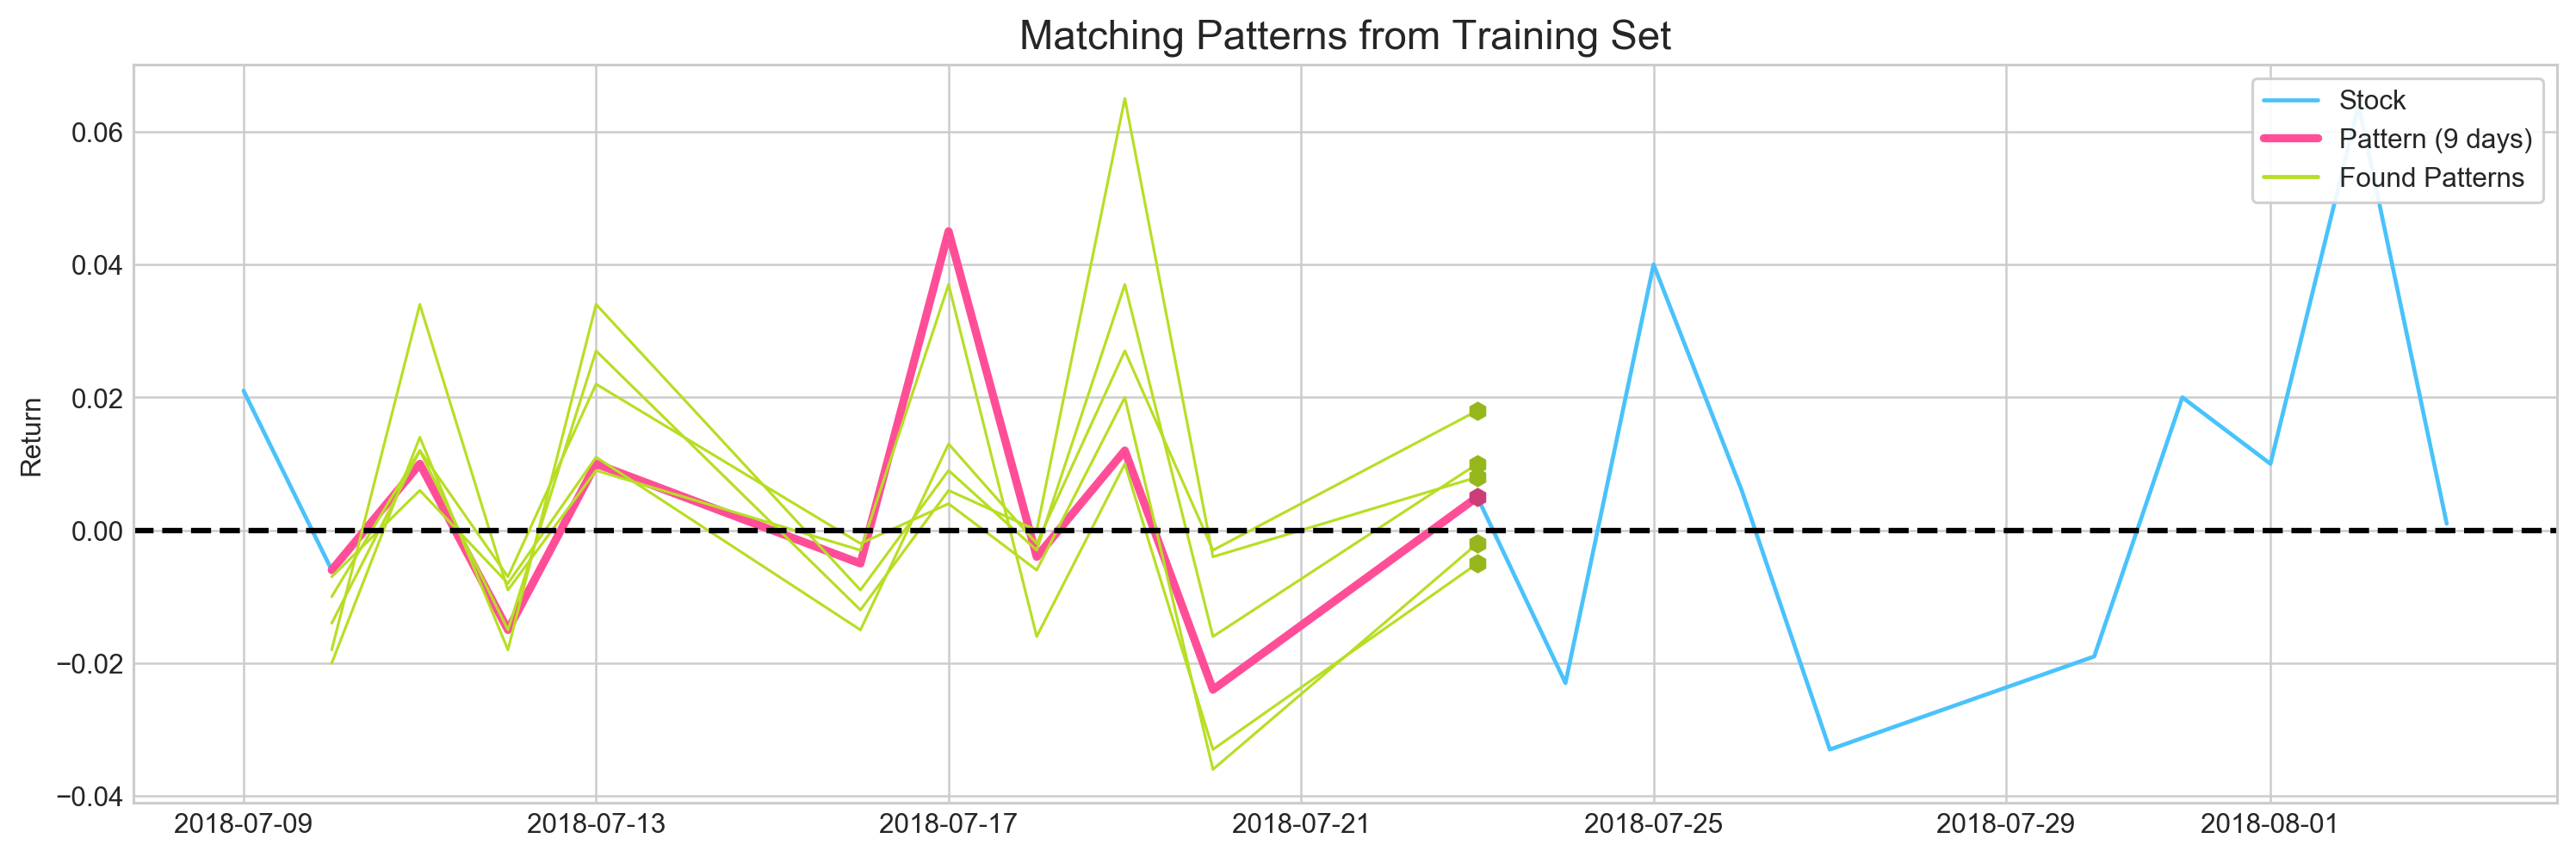

### Conclusion

Accuracy varies depends on the section of the train data we're working on. Results are inconsistent, but generally approaching baseline model results.

# 7. Q-Learning

## 7.1 Using MACD to Make Decision

Number of Trades: 18
Time Frame: 343 days
Profit: $-1760.04 | -11.73%


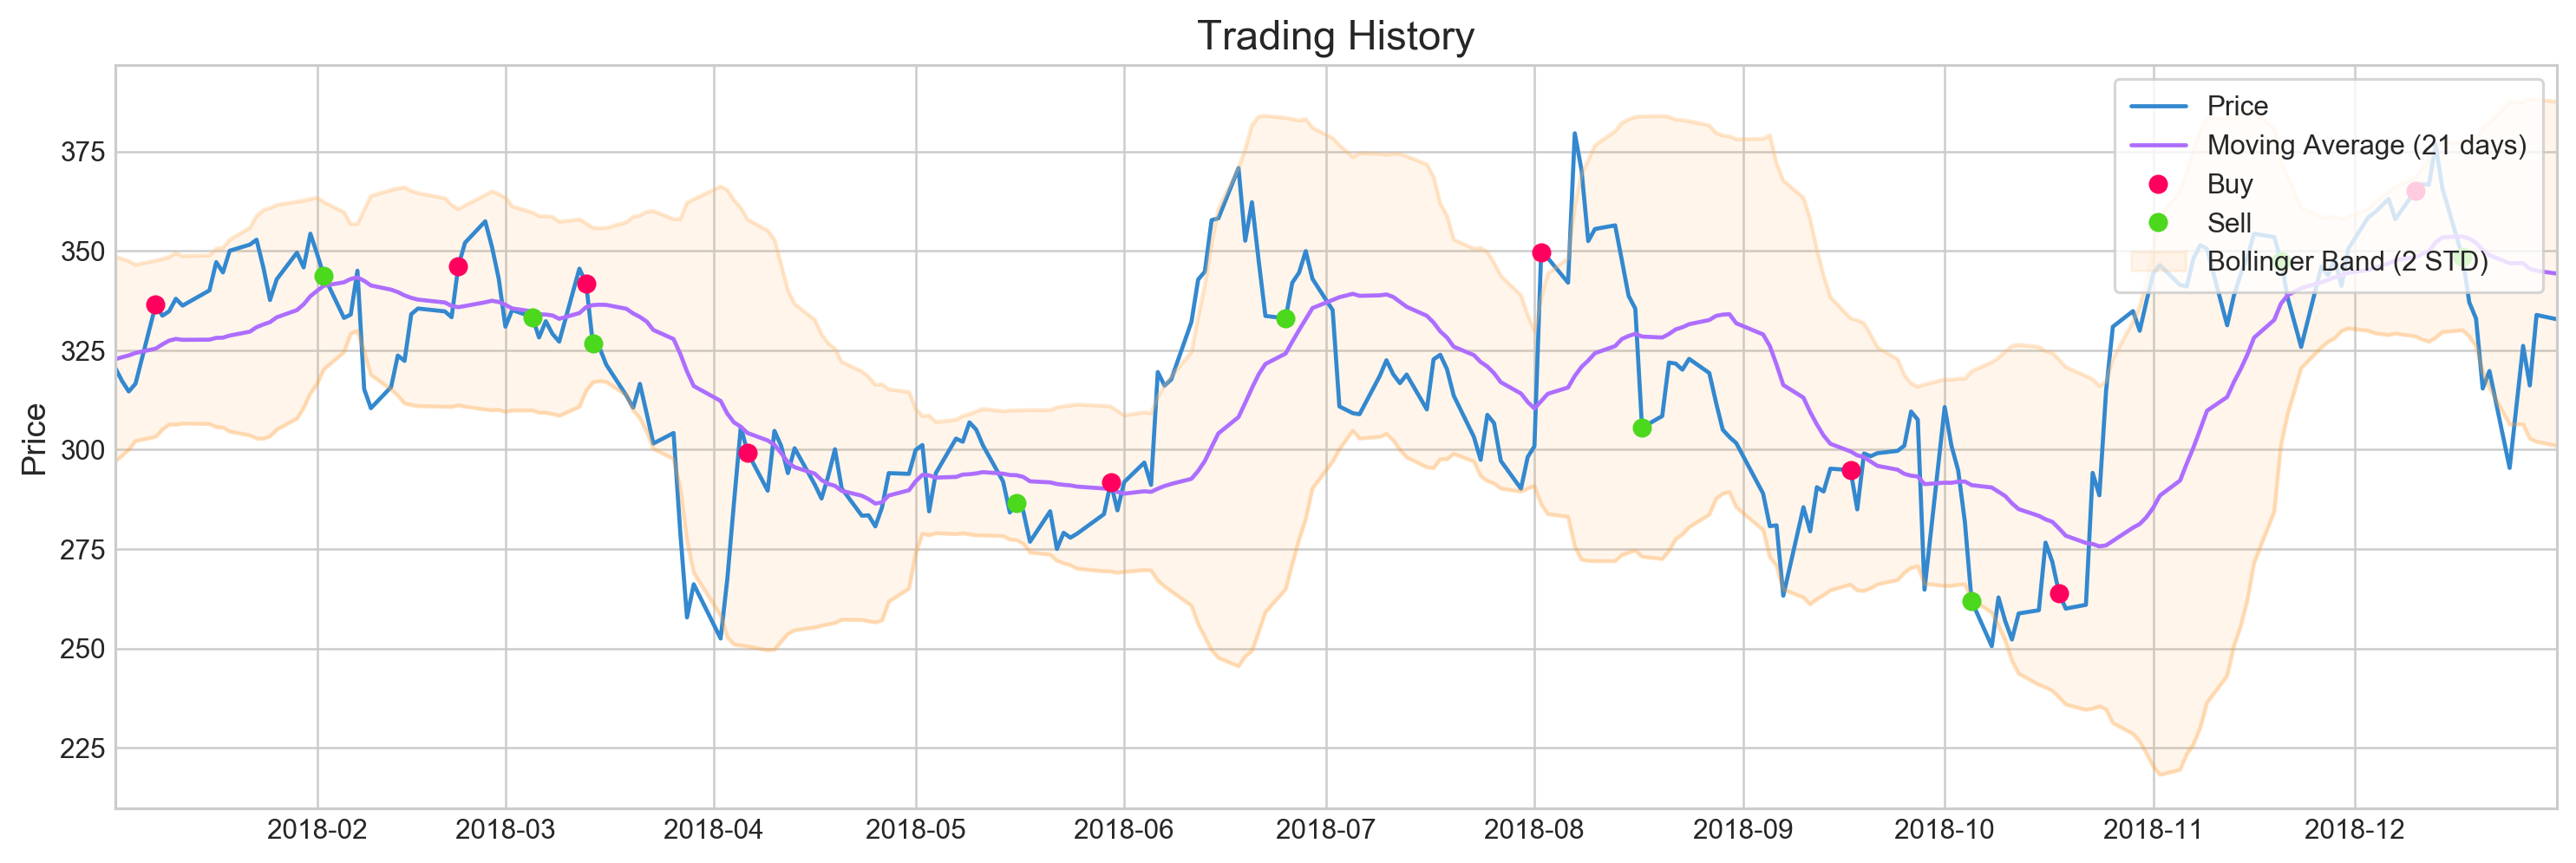

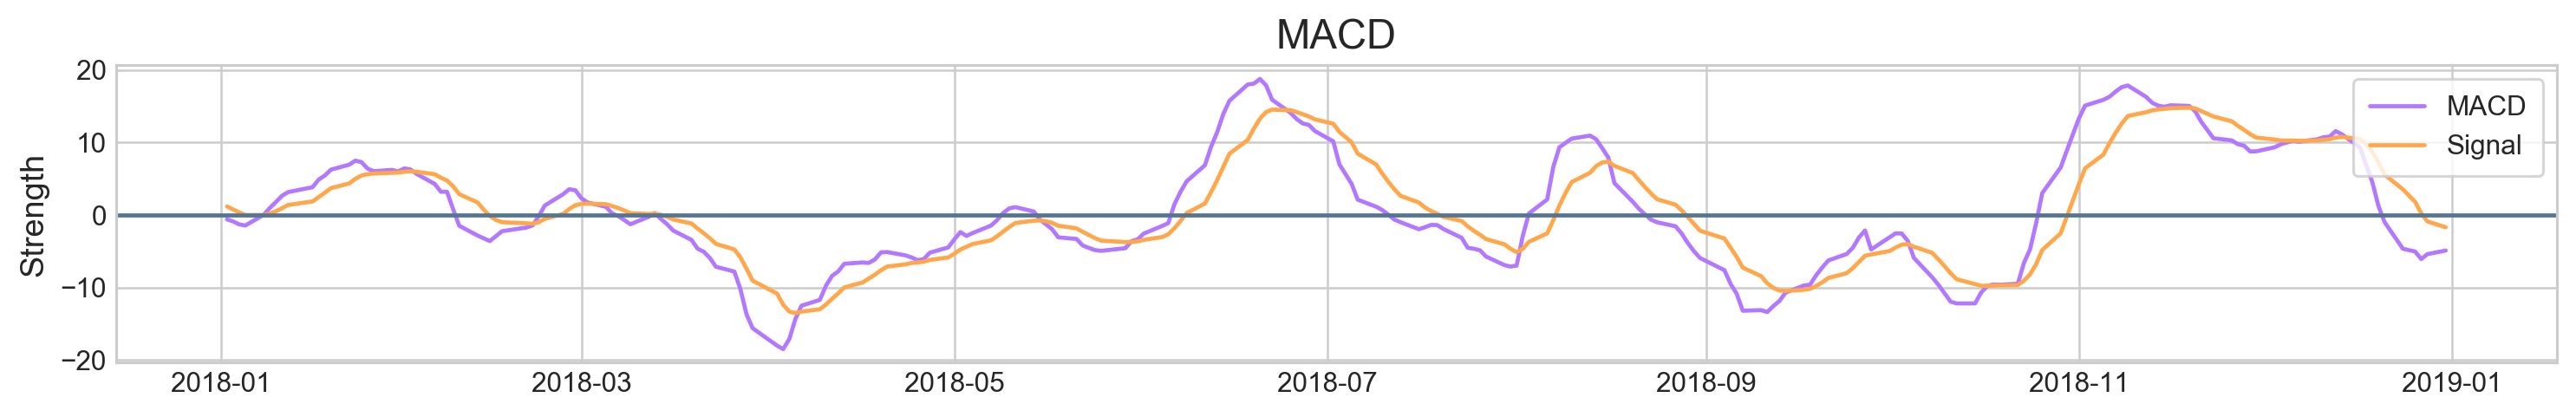

### Returns

Company  Return (%)
10    twtr       63.33
14    shop        6.32
1     orcl       -1.79
16    qcom       -3.53
5     msft      -10.93
13     vmw      -11.20
0     csco      -12.03
2     ebay      -16.27
17    aapl      -18.76
9      ibm      -23.01
11    nflx      -25.06
4     intc      -25.09
6       ea      -34.87
12    tsla      -37.28
8       fb      -51.98
7     nvda      -62.73
15    goog     -100.00
3     amzn     -100.00

### Conclusion

You're going to lose money if you use MACD 

## 7.2 Using Bollinger Bands to Make Decision

Number of Trades: 19
Time Frame: 316 days
Profit: $15332.70 | 102.22%


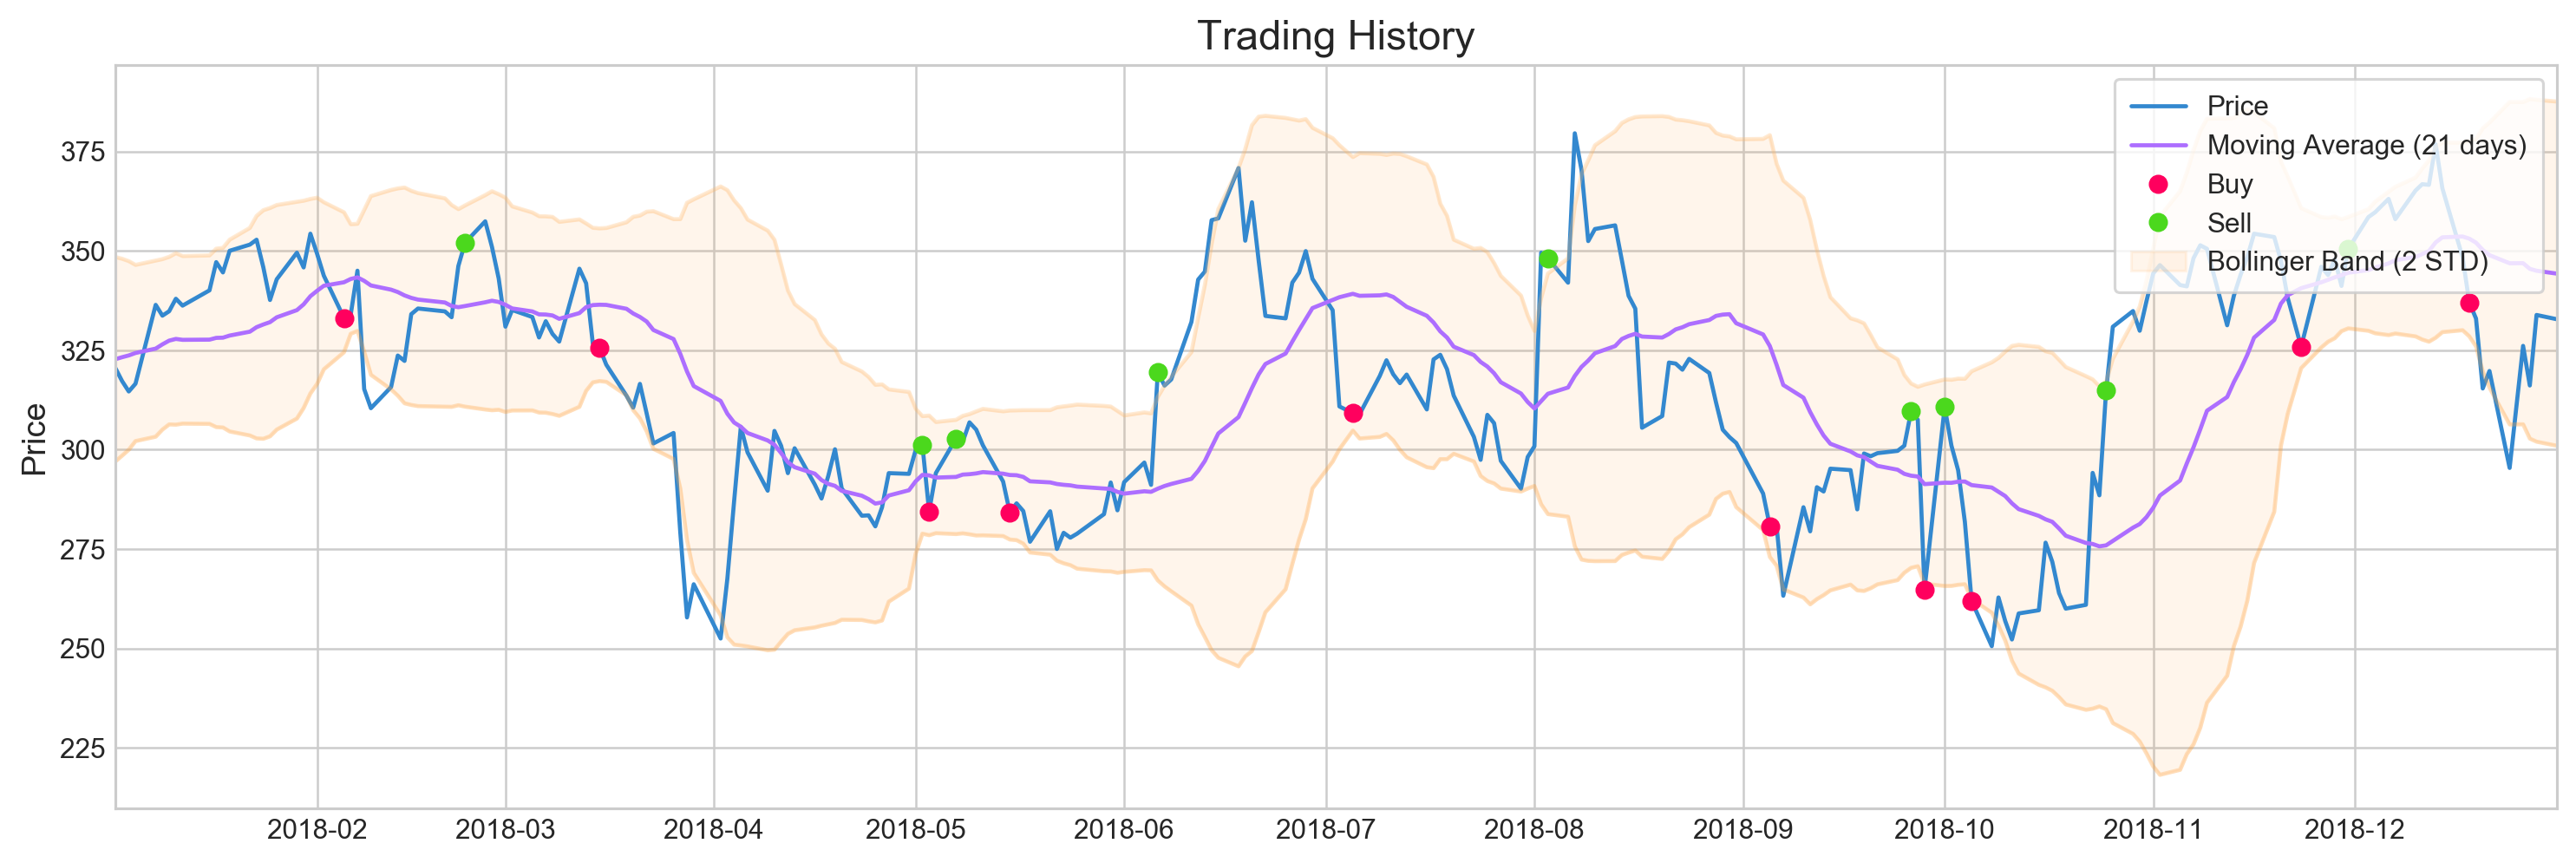

### Returns

Company  Return (%)
12    tsla       88.74
4     intc       38.42
0     csco       26.41
13     vmw       21.79
1     orcl       20.43
7     nvda       16.94
14    shop        8.91
17    aapl        7.89
11    nflx        5.41
5     msft        2.89
10    twtr        2.52
8       fb      -20.06
6       ea      -20.35
2     ebay      -23.67
9      ibm      -33.17
16    qcom      -35.28
15    goog      -59.34
3     amzn      -70.78

# Conclusion

- ARIMA model can't surpass baseline model accuracy due to the historical data stochastic behaviour.
- Convolutional model prone to overfitting, resulting on very good accuracy on training set, and extremely poor accuracy on testing set.
- Recurrent (LSTM) neural network can't learn from training data, averaging on 50% accuracy both on training and testing data
- Bayesian optimization didn't improve accuracy of convolutional network
- Neural Network architecture and complexity doesn't affect results of the model performance
- Predictions based on matching patterns from testing data with patterns from testing didn't surpass 50% accuracy
- **Q-Learning, specifically Bollinger Bands showed good results for short term investment**

# Future Work

- Incorporate fundamental analysis with historical data
- Add recommendations from trading platforms
- Use twitter as a supplement to news data
- Expand analysis to stock from different industries
- Add more rules to swing trading strategy with technical indicators